In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score

import joblib

In [3]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

In [4]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier

In [5]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

In [6]:
from scipy.stats import uniform

In [7]:
import tensorflow as tf
from tensorflow import keras

In [8]:
data_collision = pd.read_csv('test_2019_dataset_en.csv', low_memory='False', na_values=['U', 'UU', 'UUUU'])
data_collision.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,2019,1.0,1.0,11.0,2,2,32,1,1,5,...,1,2015,1,M,56,QQ,1,2,NaN,2681651
1,2019,1.0,1.0,11.0,2,2,32,1,1,5,...,1,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2681651
2,2019,1.0,1.0,11.0,2,2,32,1,1,5,...,1,2010,1,F,30,11,2,2,1.0,2681651
3,2019,1.0,1.0,11.0,2,2,32,1,1,5,...,1,2010,2,NaN,1,QQ,N,NN,NaN,2681651
4,2019,1.0,1.0,16.0,2,2,32,1,2,5,...,1,2007,1,F,27,11,2,2,1.0,2681652


## Exploratory Data Analysis

In [9]:
data_collision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272301 entries, 0 to 272300
Data columns (total 23 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   C_YEAR  272301 non-null  int64  
 1   C_MNTH  272299 non-null  float64
 2   C_WDAY  272299 non-null  float64
 3   C_HOUR  270152 non-null  float64
 4   C_SEV   272301 non-null  int64  
 5   C_VEHS  272301 non-null  int64  
 6   C_CONF  263923 non-null  object 
 7   C_RCFG  257483 non-null  object 
 8   C_WTHR  268757 non-null  object 
 9   C_RSUR  269983 non-null  object 
 10  C_RALN  258540 non-null  object 
 11  C_TRAF  258595 non-null  object 
 12  V_ID    272298 non-null  float64
 13  V_TYPE  270682 non-null  object 
 14  V_YEAR  261153 non-null  object 
 15  P_ID    269439 non-null  object 
 16  P_SEX   256509 non-null  object 
 17  P_AGE   254857 non-null  object 
 18  P_PSN   265979 non-null  object 
 19  P_ISEV  266388 non-null  object 
 20  P_SAFE  241615 non-null  object 
 21  P_USER  25

In [10]:
data_collision.isna().sum()

C_YEAR        0
C_MNTH        2
C_WDAY        2
C_HOUR     2149
C_SEV         0
C_VEHS        0
C_CONF     8378
C_RCFG    14818
C_WTHR     3544
C_RSUR     2318
C_RALN    13761
C_TRAF    13706
V_ID          3
V_TYPE     1619
V_YEAR    11148
P_ID       2862
P_SEX     15792
P_AGE     17444
P_PSN      6322
P_ISEV     5913
P_SAFE    30686
P_USER    14769
C_CASE        0
dtype: int64

In [11]:
#check the % of null values in each column

pd.DataFrame(data=[data_collision.isna().sum(), (data_collision.isna().sum()*100)/data_collision.shape[0]], 
             index=['Null#','Null%']).T.sort_values(by='Null#', ascending=False)

,Null#,Null%
P_SAFE,30686.0,11.269147
P_AGE,17444.0,6.406146
P_SEX,15792.0,5.799465
C_RCFG,14818.0,5.441772
P_USER,14769.0,5.423777
C_RALN,13761.0,5.053599
C_TRAF,13706.0,5.033401
V_YEAR,11148.0,4.093999
C_CONF,8378.0,3.076742
P_PSN,6322.0,2.321695


Four columns have no null values. C_YEAR: year the data is collected, C_VEHS:number of vehicles involved in the collision, C_SEV: severity of the collision, C_CASE: Case id for the collision. The column P_SAFE(if safety device was used) has the most 11% null values.

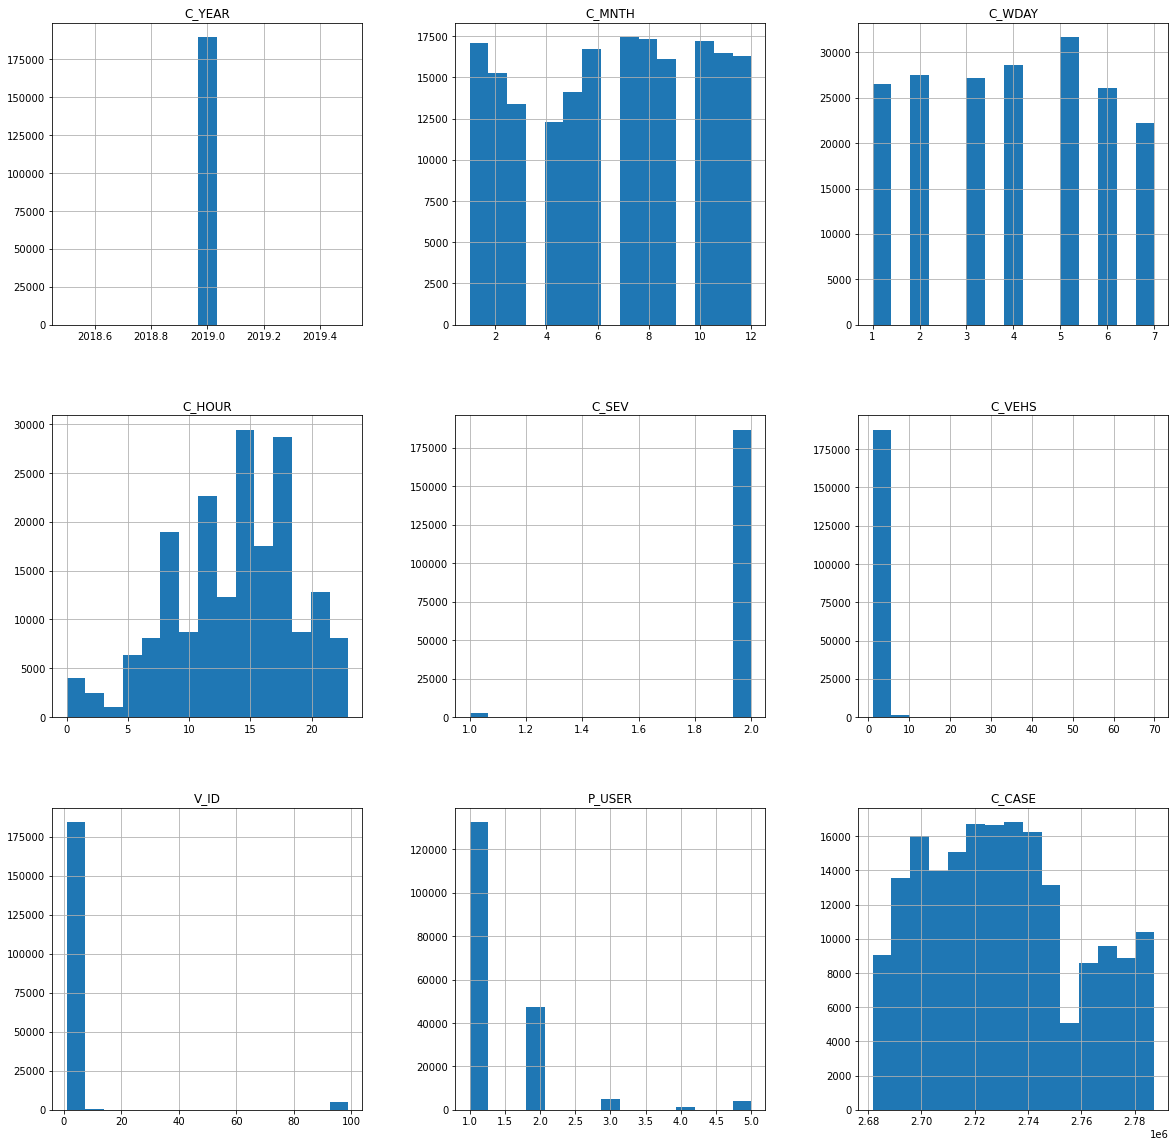

In [12]:
#visualize histogram for numerical features

data_collision.dropna().hist(bins=15, figsize=(20,20));

#### Selecting Target variable: 
C_SEV has the collision severity 1- atleast one fatality, 2-non-fatal injury. P_ISEV  has collision severity for individuals associated in the collision. 1-no injury, 2-injury, 3-fatality, N-dummy record for parked car.

We will use P_ISEV as our target variable and combine 2&3 to create label 0 which will represent injury/fatality. Label 1 will represent 'no injury'. So we will have a binary classification  problem with target values as: 0-injury or fatality, 1-no injury.
We will also drop records with value 'N' and NaN as they do not contribute to our problem statment.

In [13]:
#Case collision severity counts

data_collision['C_SEV'].value_counts(dropna=False)

2    267971
1      4330
Name: C_SEV, dtype: int64

In [14]:
#Collision severity for individuals in a collision

data_collision['P_ISEV'].value_counts(dropna=False)

2      140801
1      109386
N       14439
NaN      5913
3        1762
Name: P_ISEV, dtype: int64

In [15]:
#Drop P_ISEV records with values as NaN and 'N'

data_collision.drop(data_collision[data_collision['P_ISEV'].isin(['N', np.nan])].index, inplace=True)

In [16]:
data_collision['P_ISEV'].value_counts(dropna=False)

2    140801
1    109386
3      1762
Name: P_ISEV, dtype: int64

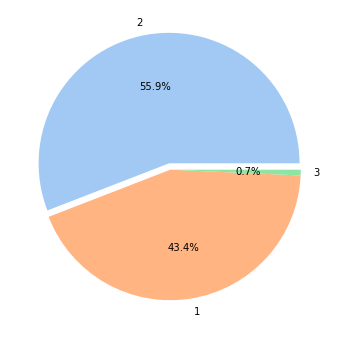

In [17]:
#Visualize target P_ISEV column values

plt.figure(figsize=(6,6))
colors = sns.color_palette('pastel')[:4]
plt.pie(data_collision['P_ISEV'].value_counts(), explode=(0.05,0,0), autopct='%.1f%%', colors=colors, labels=data_collision['P_ISEV'].value_counts().index)
plt.show()

In [18]:
# Convert p_isev to 'int' and change I_psev values=3 to 2

data_collision['P_ISEV'] = data_collision['P_ISEV'].astype('int')
data_collision['P_ISEV'] = np.where(data_collision['P_ISEV']==3,2,data_collision['P_ISEV'])

In [19]:
#Change label 2 to 0 and keep 1(no injury) as-is

data_collision['P_ISEV'] = data_collision['P_ISEV'].map({2:0, 1:1})

In [20]:
data_collision['P_ISEV'].value_counts(dropna=False)

0    142563
1    109386
Name: P_ISEV, dtype: int64

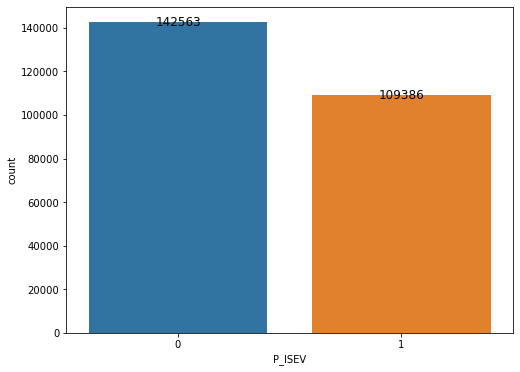

In [21]:
#Visualize target column labels. 0 - injury/fatality, 1-no injury

plt.figure(figsize=(8,6))
countplt = sns.countplot(x=data_collision['P_ISEV'])
for bar in countplt.patches:
    countplt.annotate(format(bar.get_height()), (bar.get_x()+bar.get_width()/2, bar.get_height()),
                     ha='center', va='center',size=12)
plt.show()

In [22]:
#Number of NaN values in columns after changes to P_ISEV column

pd.DataFrame(data=[data_collision.isna().sum(), data_collision.isna().sum()*100/data_collision.shape[0]],
            index=['Null#','Null%']).T.sort_values(by='Null#', ascending=False)

,Null#,Null%
P_SAFE,24310.0,9.648778
C_RCFG,13649.0,5.417366
C_RALN,13242.0,5.255826
C_TRAF,11812.0,4.688250
V_YEAR,9559.0,3.794022
P_AGE,8098.0,3.214143
C_CONF,8031.0,3.187550
P_USER,6006.0,2.383816
P_SEX,5032.0,1.997230
C_WTHR,2738.0,1.086728


P_ID: Integer sequence given to the individuals associated in a collision. Table has a record for every individual in a collision including for pedestrians. Therefore P_ID is redundant and we will drop the column for model building.


In [23]:
#P_ID counts for NN-dummy for parked cars and NaN

data_collision[data_collision['P_ID'].isin(['NN', np.nan])]['P_ID'].value_counts(dropna=False)

NaN    13
Name: P_ID, dtype: int64

In [24]:
data_collision[data_collision['P_ID'].isin(['NN', np.nan])][['P_ID','V_ID','P_PSN','P_USER','C_CASE','V_TYPE']].\
sort_values(by='C_CASE')

,P_ID,V_ID,P_PSN,P_USER,C_CASE,V_TYPE
60857,NaN,1.0,11,1.0,2681829,1
60858,NaN,1.0,13,2.0,2681829,1
66612,NaN,1.0,11,1.0,2682224,1
152983,NaN,1.0,11,1.0,2682649,6
152985,NaN,2.0,13,2.0,2682649,1
152989,NaN,1.0,11,1.0,2682686,1
152999,NaN,1.0,11,1.0,2682707,1
153000,NaN,1.0,21,2.0,2682707,1
153001,NaN,1.0,22,2.0,2682707,1
156017,NaN,2.0,QQ,NaN,2682764,16


V_ID: Vehicle sequence number. For pedestrians v_id=99. We will drop this column from ML.

In [25]:
#Records with null values for V_ID

data_collision[data_collision['V_ID'].isna()]

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
34875,2019,2.0,4.0,10.0,2,2,33,2,1,Q,...,NaN,NaN,4,M,60,11,0,2,NaN,2683864
72058,2019,4.0,2.0,9.0,2,1,6,NaN,1,1,...,NaN,NaN,1,M,31,96,0,1,NaN,2771781
170204,2019,8.0,5.0,13.0,2,1,6,1,1,1,...,NaN,NaN,1,F,47,96,0,1,NaN,2762235


In [26]:
#Cases with v_id as nan

data_collision[data_collision['C_CASE'].isin([2683864,2771781,2762235])][['P_ID','V_ID','P_PSN','P_USER','C_CASE','V_TYPE','C_CONF','P_AGE','C_RCFG']]

,P_ID,V_ID,P_PSN,P_USER,C_CASE,V_TYPE,C_CONF,P_AGE,C_RCFG
34873,1,1.0,11,1.0,2683864,1,33,18,2
34874,5,2.0,13,2.0,2683864,1,33,66,2
34875,4,NaN,11,NaN,2683864,NaN,33,60,2
72057,1,1.0,11,1.0,2771781,1,6,86,NaN
72058,1,NaN,96,NaN,2771781,NaN,6,31,NaN
170200,1,1.0,11,1.0,2762235,1,6,48,1
170201,2,1.0,13,2.0,2762235,1,6,33,1
170202,3,1.0,21,2.0,2762235,1,6,5,1
170203,4,1.0,23,2.0,2762235,1,6,1,1
170204,1,NaN,96,NaN,2762235,NaN,6,47,1


In [27]:
data_collision['V_ID'].value_counts(dropna=False)

1.0     132364
2.0      91557
3.0      12897
99.0     10808
4.0       2628
         ...  
46.0         1
51.0         1
52.0         1
53.0         1
58.0         1
Name: V_ID, Length: 64, dtype: int64

In [28]:
#Values in columns we won't be using for ML

cols = ['C_YEAR','V_ID', 'P_ID', 'C_SEV']


for col in cols:
    
    print("Unique values in {} :".format(col), data_collision[col].nunique())
    print(sorted(data_collision[col].astype('float').unique()),'\n')

Unique values in C_YEAR : 1
[2019.0] 

Unique values in V_ID : 63
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, nan, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 71.0, 77.0, 83.0, 99.0] 

Unique values in P_ID : 72
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, nan] 

Unique values in C_SEV : 2
[1.0, 2.0] 



### Feature Engineeering

In [29]:
# Create a copy of the data for data imputation and feature engineering

data = data_collision.copy()
data.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,2019,1.0,1.0,11.0,2,2,32,1,1,5,...,1,2015,1,M,56,QQ,1,2,NaN,2681651
2,2019,1.0,1.0,11.0,2,2,32,1,1,5,...,1,2010,1,F,30,11,0,2,1.0,2681651
4,2019,1.0,1.0,16.0,2,2,32,1,2,5,...,1,2007,1,F,27,11,0,2,1.0,2681652
5,2019,1.0,1.0,16.0,2,2,32,1,2,5,...,1,2007,2,F,5,33,1,2,2.0,2681652
6,2019,1.0,1.0,16.0,2,2,32,1,2,5,...,1,2009,1,M,18,11,0,2,1.0,2681652


C_MNTH: Has 2 null values. Impute nulls with the mode and change column type to 'int'.

In [30]:
data['C_MNTH'].value_counts(dropna=False)

7.0     22960
1.0     22910
8.0     22871
10.0    22743
6.0     22089
11.0    21779
12.0    21581
9.0     21452
2.0     20467
5.0     18798
3.0     18111
4.0     16186
NaN         2
Name: C_MNTH, dtype: int64

In [31]:
#Impute null with mode and convert to int

data['C_MNTH'].fillna(data['C_MNTH'].mode()[0], inplace=True)
data['C_MNTH'] = data['C_MNTH'].astype('int')

C_WDAY: Has 2 null values. Impute nulls with mode and convert to 'int'.

In [32]:
data['C_WDAY'].value_counts(dropna=False)

5.0    42210
4.0    37920
3.0    36632
2.0    36448
1.0    35066
6.0    34277
7.0    29394
NaN        2
Name: C_WDAY, dtype: int64

In [33]:
#Impute null with mode and convert to int

data['C_WDAY'].fillna(data['C_WDAY'].mode()[0], inplace=True)
data['C_WDAY'] = data['C_WDAY'].astype('int')

C_HOUR: Has <1% null values. Impute nulls with mode for weekdays and weekends and convert column to 'int'.

In [34]:
#Hour Mode for weekend and weekdays

data[data['C_WDAY'].isin([6,7])]['C_HOUR'].mode()[0] #15 weekends
data[~data['C_WDAY'].isin([6,7])]['C_HOUR'].mode()[0]  #16 weeddays

16.0

In [35]:
#Update C_HOUR modes for weekdays and weekends and convert to int

data.loc[(data['C_HOUR'].isna()) & (data['C_WDAY'].isin([6,7])), 'C_HOUR'] = data[data['C_WDAY'].isin([6,7])]['C_HOUR'].mode()[0]
data.loc[(data['C_HOUR'].isna()) & (~data['C_WDAY'].isin([6,7])), 'C_HOUR'] = data[~data['C_WDAY'].isin([6,7])]['C_HOUR'].mode()[0]

data['C_HOUR'] = data['C_HOUR'].astype('int')

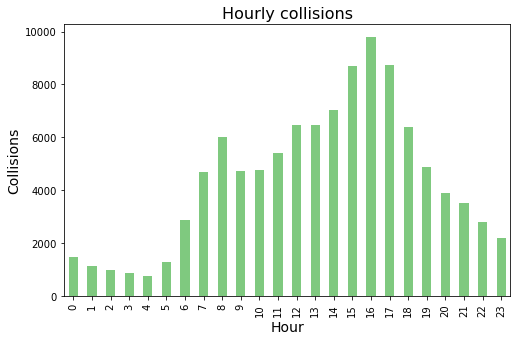

In [36]:
#Visualize hourly collisions 

plt.figure(figsize=(8,5))
data.groupby(['C_HOUR'])['C_CASE'].nunique().plot(kind='bar', colormap='Accent')
plt.title("Hourly collisions", fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Collisions', fontsize=14)
plt.show()

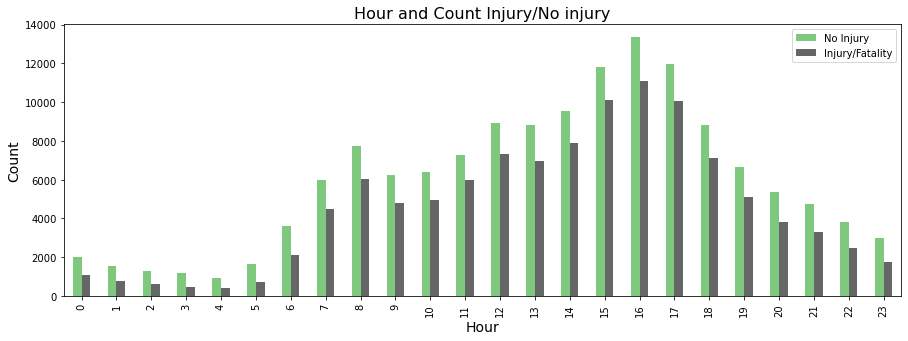

In [37]:
#injury/fatality every hour

pd.crosstab(index=data['C_HOUR'], columns=data['P_ISEV']).plot(kind = 'bar', figsize=(15,5),  colormap='Accent')
plt.title("Hour and Count Injury/No injury", size=16)
plt.xlabel("Hour",size=14)
plt.ylabel("Count", size=14)
plt.legend(labels=['No Injury','Injury/Fatality'])
plt.show()

### Functions for visializtions:

In [38]:
#function to plot bar charts,  collisions for every feature variable

def plot_bar(series_data, title, xlabel, ylabel):
    plt.figure(figsize=(8,5))
    series_data.plot(kind='bar', colormap='Accent')
    plt.title(title, size=16)
    plt.xlabel(xlabel, size=14)
    plt.ylabel(ylabel, size=14)
plt.show()

In [39]:
#Function to visualize relation between categorical and target variable

def plot_cat_feature(data, title, xlabel, ylabel):
    #plt.figure(figsize=(15,5))
    data.plot(kind='bar', figsize=(15,5), colormap='Accent')
    plt.title(title, size=16)
    plt.xlabel(xlabel, size=14)
    plt.ylabel(ylabel, size=14)
    plt.legend(labels=['No Injury','Injury/Fatality'])
plt.show()

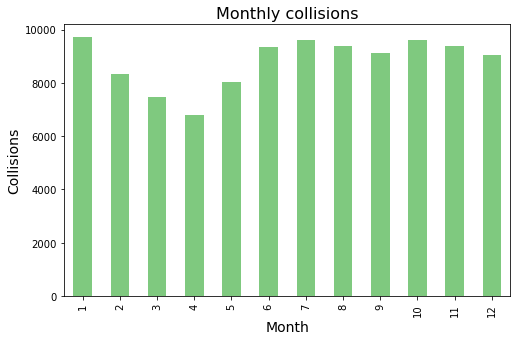

In [40]:
#Visualize monthly collisions

plot_bar(data.groupby(['C_MNTH'])['C_CASE'].nunique(), "Monthly collisions", 'Month', 'Collisions')

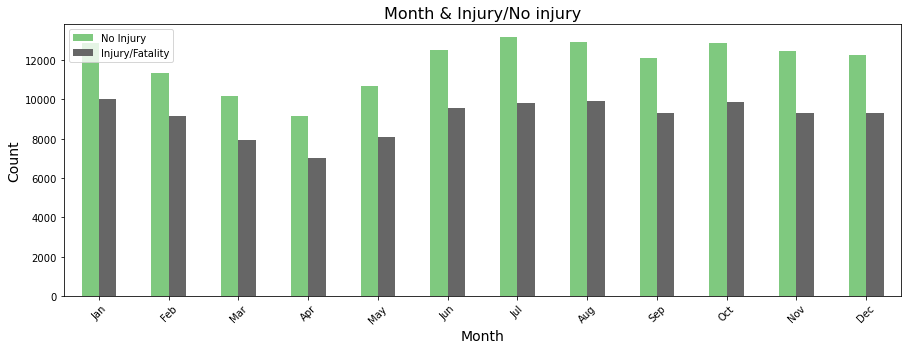

In [41]:
#Injury/Fatality every month

plot_cat_feature(pd.crosstab(index=data['C_MNTH'], columns=data['P_ISEV']), "Month & Injury/No injury","Month",\
                 "Count")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct',\
                                                'Nov','Dec'], rotation=45);

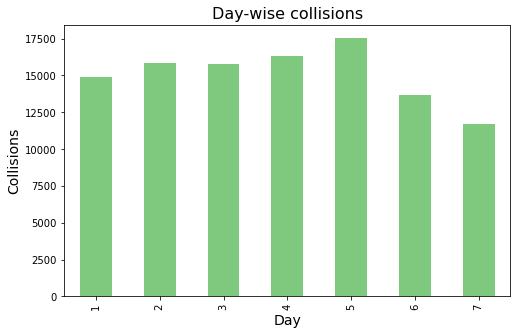

In [42]:
#Visualize day-wise collisions

plot_bar(data.groupby(['C_WDAY'])['C_CASE'].nunique(), "Day-wise collisions", 'Day', 'Collisions')

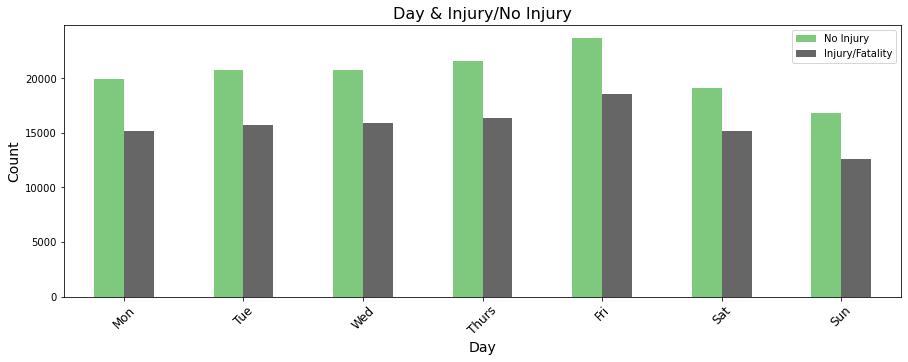

In [43]:
#Day-wise Injury/Fatality counts

plot_cat_feature(pd.crosstab(index=data['C_WDAY'], columns=data['P_ISEV']), "Day & Injury/No Injury","Day","Count")
plt.xticks([0,1,2,3,4,5,6], labels=['Mon','Tue','Wed','Thurs','Fri','Sat','Sun'], rotation=45, fontsize=12);

C_VEHS: Vehicles involved in the collision. There are no null values. We will keep this column as int for now. We can possibly bin the values and change it into a categorical column.

C_CONF: Has 3% null values. Specifies type of collision: single vehicle collison types, 2 vehicles in same direction of travel, two vehicles in different directions of travel, two vehicles- one is parked, and qq - different choice other than the given. We will impute C_CONF value based on C_VEHS value.
    If C_VEHS=1, impute with C_CONF mode value for single car collisions.
    If C_VEHS>1, impute with C_CONF mode value for multi vehicle collision.

In [44]:
data['C_CONF'].value_counts(dropna=False)

21     73376
35     34746
36     23895
6      23501
33     18179
QQ     13719
2       9524
4       8859
22      8507
31      8120
NaN     8031
3       6095
32      2716
23      2682
1       2474
41      2421
24      2098
34      1435
25       871
5        700
Name: C_CONF, dtype: int64

In [45]:
#create C_CONF1 with values imputed for NaN

mode1 = data[data['C_VEHS']==1]['C_CONF'].mode()[0] #6
mode2 = data[data['C_VEHS']>1]['C_CONF'].mode()[0] #21

data['C_CONF1'] = np.select([(data['C_CONF'].isna()) & (data['C_VEHS']==1), 
                              (data['C_CONF'].isna()) & (data['C_VEHS']>1)], [mode1, mode2], 
                             default=data['C_CONF'])

In [46]:
#Check counts after imputing values

data['C_CONF1'].value_counts(dropna=False)

21    80002
35    34746
6     24906
36    23895
33    18179
QQ    13719
2      9524
4      8859
22     8507
31     8120
3      6095
32     2716
23     2682
1      2474
41     2421
24     2098
34     1435
25      871
5       700
Name: C_CONF1, dtype: int64

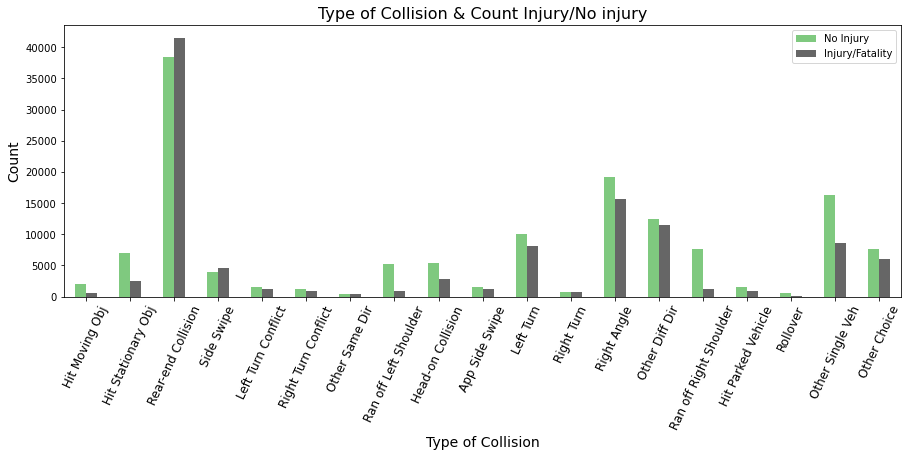

In [49]:
#Type of collision and count of Injury/No injury

plot_cat_feature(pd.crosstab(index=data['C_CONF1'], columns=data['P_ISEV']),\
                 "Type of Collision & Count Injury/No injury", "Type of Collision","Count")
plt.xticks(list(range(data['C_CONF1'].nunique())), labels=['Hit Moving Obj','Hit Stationary Obj',
            'Rear-end Collision','Side Swipe','Left Turn Conflict','Right Turn Conflict','Other Same Dir',
            'Ran off Left Shoulder','Head-on Collision','App Side Swipe','Left Turn','Right Turn',
      'Right Angle','Other Diff Dir','Ran off Right Shoulder','Hit Parked Vehicle','Rollover','Other Single Veh',
                        'Other Choice'], rotation=65, fontsize=12);

In [50]:
list(range(data['C_CONF1'].nunique()+1))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

C_RCFG: Location of collision. Has ~ 5.5% null values. We will impute C_RCFG based on V_ID values. If V_ID=99 (pedestrian), impute mode associated with pedestrians else (V_id != 99 - single or multi-vehicle collision) impute with mode associated with not a pedestrian

In [51]:
data['C_RCFG'].value_counts(dropna=False)

2      112205
1      105378
NaN     13649
3        9042
QQ       7677
5        2059
8         702
4         623
6         285
9         253
10         50
7          26
Name: C_RCFG, dtype: int64

In [52]:
#Create column C_RCFG1 with values imputed for NaN. We use != 99 since this will take care of the 3 entries for
#which v_id is null. Mode is same in both the cases

rcfg_mode1 = data[data['V_ID']==99]['C_RCFG'].mode()[0]  #2
rcfg_mode2 = data[data['V_ID'] != 99]['C_RCFG'].mode()[0]  #2

data['C_RCFG1'] = np.select([(data['C_RCFG'].isna()) & (data['V_ID']==99),
          (data['C_RCFG'].isna()) & (data['V_ID']!=99)], [rcfg_mode1, rcfg_mode2], default=data['C_RCFG'])

In [53]:
#Check counts after imputing values

data['C_RCFG1'].value_counts(dropna=False)

2     125854
1     105378
3       9042
QQ      7677
5       2059
8        702
4        623
6        285
9        253
10        50
7         26
Name: C_RCFG1, dtype: int64

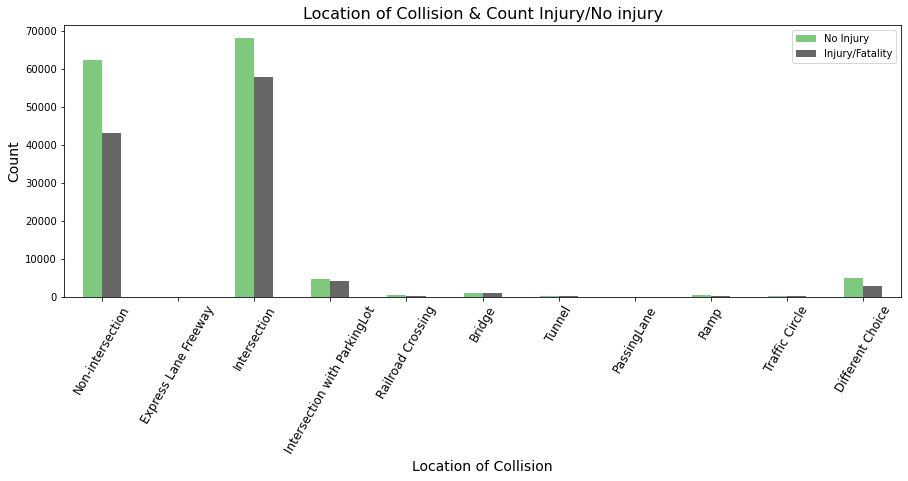

In [54]:
#Location of collision and count of Injury/No injury

plot_cat_feature(pd.crosstab(index=data['C_RCFG1'], columns=data['P_ISEV']),\
                 "Location of Collision & Count Injury/No injury", "Location of Collision","Count")
plt.xticks(list(range(data['C_RCFG1'].nunique())), labels=['Non-intersection','Express Lane Freeway',
                        'Intersection','Intersection with ParkingLot','Railroad Crossing',
            'Bridge','Tunnel','PassingLane','Ramp','Traffic Circle','Different Choice'], rotation=60, fontsize=12);

C_WTHR: Weather. Contains 1% null values. We will impute NaN with mode.

In [55]:
data['C_WTHR'].value_counts(dropna=False)

1      180856
2       21621
3       21298
4       17207
6        5042
NaN      2738
5        1718
7         879
Q         590
Name: C_WTHR, dtype: int64

In [56]:
#Impute null values with mode

data['C_WTHR'].fillna(data['C_WTHR'].mode()[0], inplace=True)  #1

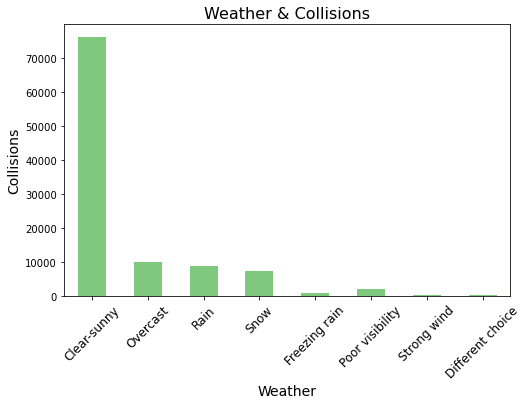

In [57]:
#Visualize weather conditions and number of collisions

plot_bar(data.groupby(['C_WTHR'])['C_CASE'].nunique(), "Weather & Collisions", 'Weather', 'Collisions')
plt.xticks([0,1,2,3,4,5,6,7], 
           labels=['Clear-sunny','Overcast','Rain','Snow','Freezing rain','Poor visibility','Strong wind',\
                  'Different choice'],
          rotation=45, fontsize=12);


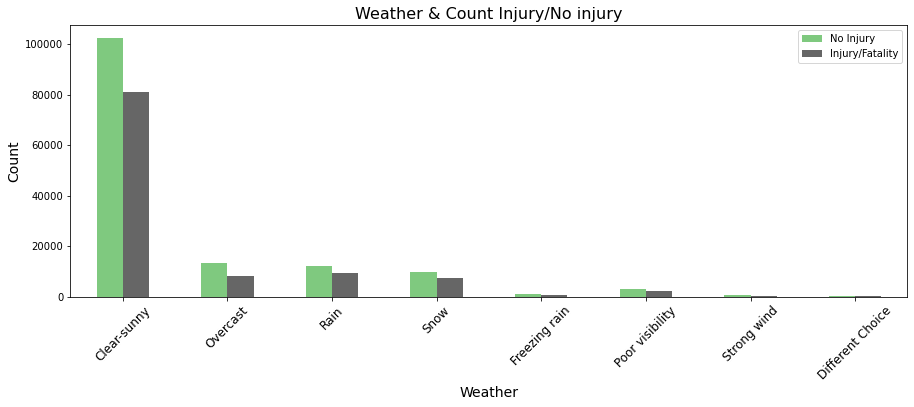

In [58]:
#Weather and count of Injury/No injury

plot_cat_feature(pd.crosstab(index=data['C_WTHR'], columns=data['P_ISEV']),\
                 "Weather & Count Injury/No injury", "Weather","Count")
plt.xticks(list(range(data['C_WTHR'].nunique())), labels=['Clear-sunny','Overcast','Rain','Snow',\
                'Freezing rain','Poor visibility','Strong wind','Different Choice'], rotation=45,
          fontsize=12);

C_RSUR: Road surface condition. Contains < 1% null values. We will impute null with mode.

In [59]:
data['C_RSUR'].value_counts(dropna=False)

1      167449
2       39721
5       15926
3       11850
Q       10123
4        3943
NaN      1940
6         769
7         157
8          40
9          31
Name: C_RSUR, dtype: int64

In [60]:
data['C_RSUR'].fillna(data['C_RSUR'].mode()[0], inplace=True) #1

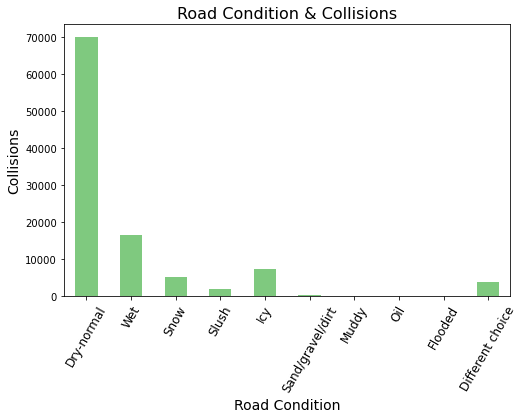

In [61]:
#Visualize road surface condition and number of collisions


plot_bar(data.groupby(['C_RSUR'])['C_CASE'].nunique(), "Road Condition & Collisions", 'Road Condition', 'Collisions')
plt.xticks([0,1,2,3,4,5,6,7,8,9], 
           labels=['Dry-normal','Wet','Snow','Slush','Icy','Sand/gravel/dirt','Muddy', 'Oil','Flooded',\
                  'Different choice'],
          rotation=60, fontsize=12);


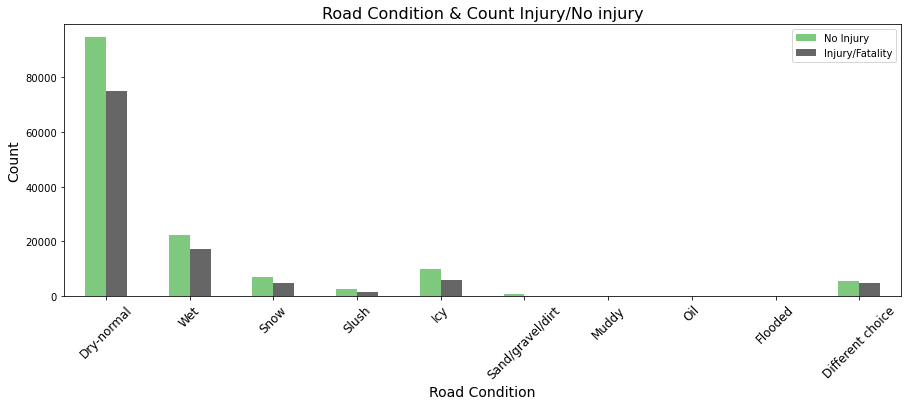

In [62]:
#Road condition and count of Injury/No injury

plot_cat_feature(pd.crosstab(index=data['C_RSUR'], columns=data['P_ISEV']),\
                 "Road Condition & Count Injury/No injury", "Road Condition","Count")
plt.xticks(list(range(data['C_RSUR'].nunique())), labels=['Dry-normal','Wet','Snow','Slush','Icy',\
                    'Sand/gravel/dirt','Muddy', 'Oil','Flooded','Different choice'], rotation=45,
          fontsize=12);

C_RALN: Type of road or road alignment. Contains 5% null values. We will impute null with mode.

In [63]:
data['C_RALN'].value_counts(dropna=False)

1      190170
2       19721
3       15336
NaN     13242
4        7490
5        3040
6        2442
Q         508
Name: C_RALN, dtype: int64

In [64]:
data['C_RALN'].fillna(data['C_RALN'].mode()[0], inplace=True)

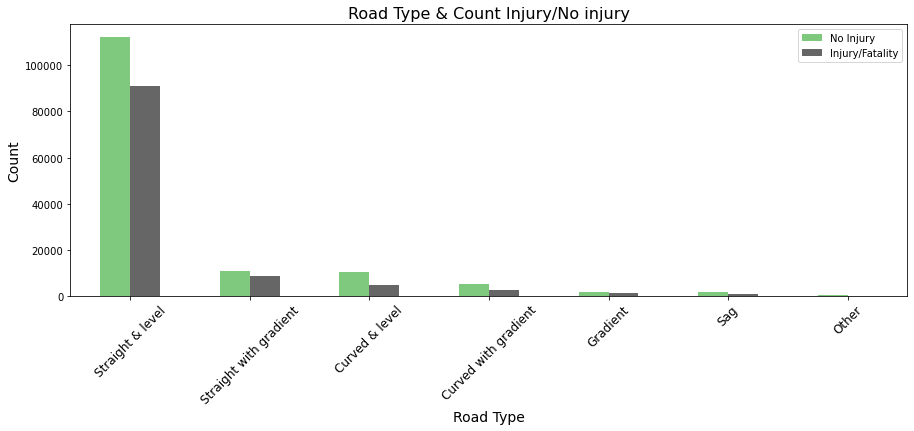

In [65]:
#Type of Road and count of Injury/No injury

plot_cat_feature(pd.crosstab(index=data['C_RALN'], columns=data['P_ISEV']),\
                 "Road Type & Count Injury/No injury", "Road Type","Count")
plt.xticks(list(range(data['C_RALN'].nunique())), labels=['Straight & level','Straight with gradient',
                    'Curved & level','Curved with gradient','Gradient','Sag','Other'], \
           rotation=45, fontsize=12);

C_TRAF: Traffic signs at the location. Has < 5% null values. We will impute null with mode.

In [66]:
data['C_TRAF'].value_counts(dropna=False)

18     124645
1       72829
3       29451
NaN     11812
4        4267
QQ       3997
6        1908
2         908
8         805
12        377
11        248
13        141
17        128
15        127
5          86
16         76
10         75
7          49
9          20
Name: C_TRAF, dtype: int64

In [67]:
data['C_TRAF'].fillna(data['C_TRAF'].mode()[0], inplace=True)

V_TYPE: Vehicle type. Has < 1% null values and ~4% records has value as 'NN' indicating pedestrians. If v_type is null and v_id=99 (indicating pedestrian) we will impute a new value (24) for v_type, if v_type=NN we will replace it with '24', if v_type is null and v_id != 99 v_type will be imputed with mode.

In [68]:
data['V_TYPE'].value_counts(dropna=False)

1      209548
NN      10974
14       5888
17       4657
6        4180
7        4018
8        2968
11       2574
5        2313
NaN      1319
9        1268
QQ        931
16        373
20        320
23        142
22        140
18        122
19        109
21         72
10         33
Name: V_TYPE, dtype: int64

In [69]:
data[(data['V_TYPE']=='NN') & (data['V_ID']==99)]  #difference of 171

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE,C_CONF1,C_RCFG1
32,2019,1,1,21,2,1,2,1,1,4,...,1,F,65,99,0,NN,3.0,2681833,2,1
67,2019,1,1,18,2,1,35,1,1,3,...,2,F,47,99,0,NN,3.0,2683953,35,1
69,2019,1,1,19,2,1,2,2,1,3,...,2,F,54,99,0,NN,3.0,2683996,2,2
122,2019,1,1,13,2,1,1,2,1,1,...,1,F,56,99,0,NN,3.0,2687494,1,2
125,2019,1,1,16,2,1,1,2,3,2,...,1,M,13,99,0,NN,3.0,2687564,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272231,2019,12,7,21,2,1,33,2,1,1,...,1,F,51,99,0,NN,3.0,2785397,33,2
272244,2019,12,7,15,2,1,21,QQ,1,1,...,1,M,71,99,0,NN,3.0,2785594,21,QQ
272251,2019,12,7,17,2,1,33,2,1,1,...,1,F,50,99,0,NN,3.0,2785608,33,2
272259,2019,12,7,11,2,1,33,2,1,1,...,1,F,26,99,0,NN,3.0,2785783,33,2


In [70]:
#Create column V_TYPE1 with null values imputed with the logic mentioned above.

data['V_TYPE1'] = np.select([(data['V_TYPE'].isnull()) & (data['V_ID']==99),#1
                             (data['V_TYPE'].isnull()) & (data['V_ID']!=99), #1318 
                             (data['V_TYPE']=='NN')], #10974
                            ['24', data['V_TYPE'].mode()[0], '24'], default=data['V_TYPE'])

In [71]:
#check imputed value counts 

data['V_TYPE1'].value_counts(dropna=False)

1     210866
24     10975
14      5888
17      4657
6       4180
7       4018
8       2968
11      2574
5       2313
9       1268
QQ       931
16       373
20       320
23       142
22       140
18       122
19       109
21        72
10        33
Name: V_TYPE1, dtype: int64

In [72]:
#Records which are marked as pedestrians in v_type but not in v_id

data.loc[data[data['V_TYPE1']=='24'].index.difference(data[data['V_ID']==99].index)]

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE,C_CONF1,C_RCFG1,V_TYPE1
7239,2019,1,3,18,2,2,21,1,1,1,...,F,23,11,0,2,NaN,2684277,21,1,24
7240,2019,1,3,18,2,2,21,1,1,1,...,F,22,11,0,2,NaN,2684277,21,1,24
7262,2019,1,3,9,2,3,21,NaN,4,3,...,M,35,11,0,2,NaN,2684306,21,2,24
11402,2019,1,4,16,2,2,23,1,4,3,...,M,67,11,0,2,NaN,2684199,23,1,24
11418,2019,1,4,7,2,2,21,2,1,5,...,F,45,13,1,2,NaN,2684220,21,2,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266455,2019,12,6,17,2,2,21,NaN,4,5,...,M,21,11,1,2,NaN,2686962,21,2,24
266490,2019,12,6,14,2,2,35,2,4,3,...,M,67,11,1,2,NaN,2687036,35,2,24
266501,2019,12,6,15,2,2,21,3,1,4,...,M,19,11,1,2,NaN,2687052,21,3,24
266549,2019,12,6,17,2,2,21,1,4,3,...,M,20,11,1,2,NaN,2687181,21,1,24


In [73]:
#records with are marked as peds in v_id and not in v_type1

data.loc[data[data['V_ID']==99].index.difference(data[data['V_TYPE1']=='24'].index)]

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE,C_CONF1,C_RCFG1,V_TYPE1
107707,2019,6,2,13,2,4,2,QQ,1,1,...,M,15,NN,0,NN,3.0,2683842,2,QQ,1
107708,2019,6,2,13,2,4,2,QQ,1,1,...,M,15,NN,0,NN,3.0,2683842,2,QQ,1
107709,2019,6,2,13,2,4,2,QQ,1,1,...,F,25,NN,0,NN,3.0,2683842,2,QQ,1
111024,2019,6,3,9,2,1,6,2,1,1,...,F,64,NN,0,NN,3.0,2684069,6,2,1


In [74]:
#P_psn values for records as pedestrians in v_type1 but not in v_id. P_user values are null for these 171 records

data.loc[data[data['V_TYPE1']=='24'].index.difference(data[data['V_ID']==99].index)]['P_PSN']\
.value_counts(dropna=False)

11     130
13      24
23       7
NaN      2
QQ       2
21       2
33       2
12       1
31       1
Name: P_PSN, dtype: int64

These 171 records seem to be drivers or passengers based on values in p_psn and v_id. We will update v_type1 for the above 171 records as 1(LMV) which is also the mode for v_type column.

In [75]:
# update v_type1 from 24pedestrins to 1LMV for above 171 records

data['V_TYPE1'] = np.where((data['V_TYPE']=='NN') & (data['V_ID'] !=99), '1', data['V_TYPE1'])

In [76]:
#check imputed value counts 

data['V_TYPE1'].value_counts(dropna=False)

1     211037
24     10804
14      5888
17      4657
6       4180
7       4018
8       2968
11      2574
5       2313
9       1268
QQ       931
16       373
20       320
23       142
22       140
18       122
19       109
21        72
10        33
Name: V_TYPE1, dtype: int64

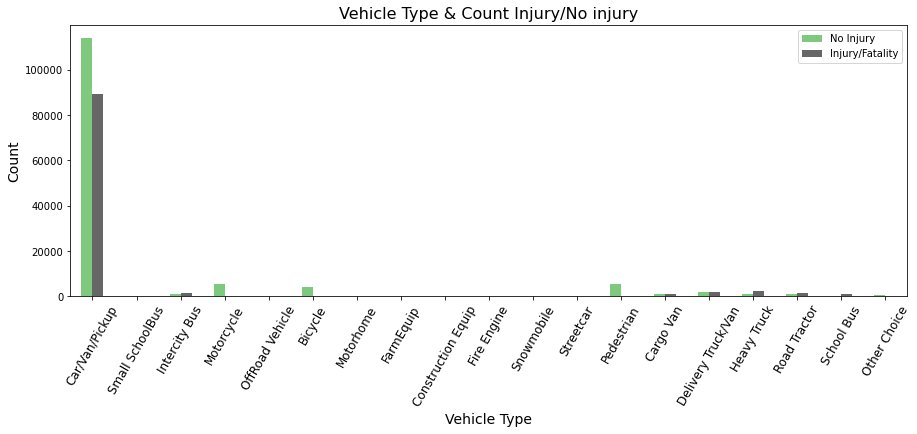

In [294]:
#Type of vehicle and count of Injury/no injury

plot_cat_feature(pd.crosstab(index=data['V_TYPE1'], columns=data['P_ISEV']),\
                 "Vehicle Type & Count Injury/No injury", "Vehicle Type","Count")
plt.xticks(list(range(data['V_TYPE1'].nunique())), labels=['Car/Van/Pickup','Small SchoolBus','Intercity Bus',\
            'Motorcycle','OffRoad Vehicle','Bicycle','Motorhome','FarmEquip','Construction Equip','Fire Engine', \
           'Snowmobile','Streetcar','Pedestrian','Cargo Van','Delivery Truck/Van','Heavy Truck','Road Tractor',\
           'School Bus','Other Choice'], rotation=60, fontsize=12);

In [291]:
pd.crosstab(index=data['V_TYPE1'], columns=data['P_ISEV'])

P_ISEV,0,1
V_TYPE1,,
1,114158,89169
10,17,12
11,885,1591
14,5533,279
16,318,42
17,4383,56
18,53,66
19,51,42
20,93,211


P_SEX: sex of persons involved in the collision. Has ~2% null values. We will impute null with mode.

In [77]:
data['P_SEX'].value_counts(dropna=False)

M      134745
F      112172
NaN      5032
Name: P_SEX, dtype: int64

In [78]:
#Impute mode

data['P_SEX'].fillna(data['P_SEX'].mode()[0], inplace=True)

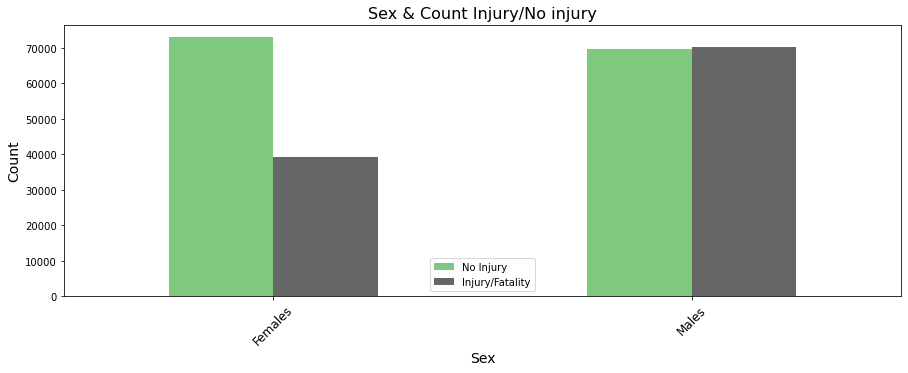

In [79]:
#Sex and count of Injury/No injury

plot_cat_feature(pd.crosstab(index=data['P_SEX'], columns=data['P_ISEV']),\
                 "Sex & Count Injury/No injury", "Sex","Count")
plt.xticks(list(range(data['P_SEX'].nunique())), labels=['Females','Males'], rotation=45, fontsize=12);

In [80]:
pd.crosstab(index=data['P_SEX'], columns=data['P_ISEV'])

P_ISEV,0,1
P_SEX,,
F,72960,39212
M,69603,70174


P_PSN: Position of persons in the collision vehicle or pedestrians. Contains <0.5% null values.

In [81]:
data['P_PSN'].value_counts(dropna=False)

11     175405
13      33226
99      10773
23      10583
21       8875
96       2979
22       2768
12       2691
QQ       1905
32        938
NaN       782
33        426
31        334
98        200
97         51
NN         13
Name: P_PSN, dtype: int64

In [82]:
data[(data['P_PSN'].isnull()) & (data['V_ID']==99)]  #1 record v-type1=24pedesrian
#data1[(data1['P_PSN'].isnull()) & (data1['V_TYPE1']=='24')] #same 1 record as above
#data1[(data1['P_PSN']=='99') & (data1['V_ID']< 99)] #no rows

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE,C_CONF1,C_RCFG1,V_TYPE1
102069,2019,5,7,14,2,2,21,5,1,1,...,M,NaN,NaN,0,NN,3.0,2685779,21,5,24


In [83]:
data[(data['P_PSN']=='NN') & (data['V_ID']==99)] #4rows with p_sex values and v_type=ped, p_user=ped
#update these 4 rows with pedestrian values p_psn=99
#data1[(data1['P_PSN']=='NN') & (data1['V_TYPE1']==24)] #no records

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE,C_CONF1,C_RCFG1,V_TYPE1
107707,2019,6,2,13,2,4,2,QQ,1,1,...,M,15,NN,0,NN,3.0,2683842,2,QQ,1
107708,2019,6,2,13,2,4,2,QQ,1,1,...,M,15,NN,0,NN,3.0,2683842,2,QQ,1
107709,2019,6,2,13,2,4,2,QQ,1,1,...,F,25,NN,0,NN,3.0,2683842,2,QQ,1
111024,2019,6,3,9,2,1,6,2,1,1,...,F,64,NN,0,NN,3.0,2684069,6,2,1


In [84]:
#Create P_PSN1 with nulls imputed with values mentioned as above.

data['P_PSN1'] = np.select([(data['P_PSN'].isnull()) & (data['V_ID']==99), #1
                            (data['P_PSN']=='NN') & (data['V_ID']==99), #4
                            data['P_PSN'].isna()],
                           ['99', '99', data['P_PSN'].mode()[0] ],
                           default = data['P_PSN'])

In [85]:
data['P_PSN1'].value_counts(dropna=False)

11    176186
13     33226
99     10778
23     10583
21      8875
96      2979
22      2768
12      2691
QQ      1905
32       938
33       426
31       334
98       200
97        51
NN         9
Name: P_PSN1, dtype: int64

In [86]:
#Drop records with value=NN for parked cars

data.drop(data[data['P_PSN1']=='NN'].index, inplace=True)

Check pedestrian counts in columns v_type1, p_psn1, p_user columns. 30 records are marked as pedestrians in v_id and v_type1 and these are not marked as '99' pedestrians in p_psn1 column. p_user for these 30 records are also marked as 3=pedestrians. We will update p_psn1 = 99 pedestrian for these 30 records.

In [87]:
#all p_psn1 pedestrian records are available in v_type1 as peds

np.unique(data[data['P_PSN1']=='99'].index.isin(data[data['V_TYPE1']=='24'].index), return_counts=True)

(array([False,  True]), array([    4, 10774]))

In [88]:
#same records with pedestrian values in v_type1 and v_id are equal
np.unique(data[data['V_TYPE1']=='24'].index.isin(data[data['V_ID']==99].index), return_counts=True)

(array([ True]), array([10804]))

In [89]:
#same records with pedestrian values in v_id and v_type1

np.unique(data[data['V_ID']==99].index.isin(data[data['V_TYPE1']=='24'].index), return_counts=True)

(array([False,  True]), array([    4, 10804]))

In [90]:
#records with pedestrian values in p_psn1 and v_id. all ped records in p_psn1 are in v_id

np.unique(data[data['P_PSN1']=='99'].index.isin(data[data['V_ID']==99].index), return_counts=True)

(array([ True]), array([10778]))

In [91]:
#30 ped records from v_id are not available in p_psn1

np.unique(data[data['V_ID']==99].index.isin(data[data['P_PSN1']=='99'].index), return_counts=True)

(array([False,  True]), array([   30, 10778]))

In [92]:
#indexes of records as peds in v_id which are not present in p_psn1

data[data['V_ID']==99].index.difference(data[data['P_PSN1']=='99'].index)

Int64Index([ 52042,  54660,  79105,  80015,  86499,  92450, 104544, 104545,
            117999, 124983, 140050, 156219, 156220, 156221, 156222, 156223,
            171385, 174868, 184599, 184600, 197985, 228867, 231899, 231952,
            235136, 243482, 246860, 256270, 262494, 266464],
           dtype='int64')

In [93]:
#indexes of records that are pedestrians according to v_type1 but not marked as peds in p_psn1

data[data['V_TYPE1']=='24'].index.difference(data[data['P_PSN1'] == '99'].index)

Int64Index([ 52042,  54660,  79105,  80015,  86499,  92450, 104544, 104545,
            117999, 124983, 140050, 156219, 156220, 156221, 156222, 156223,
            171385, 174868, 184599, 184600, 197985, 228867, 231899, 231952,
            235136, 243482, 246860, 256270, 262494, 266464],
           dtype='int64')

In [94]:
#Check if the 30 records present in v_id and v_type1 are the same which are not marked as pedestrians in p_psn1

data[data['V_TYPE1']=='24'].index.difference(data[data['P_PSN1'] == '99'].index) == \
data[data['V_ID']==99].index.difference(data[data['P_PSN1'] == '99'].index)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [95]:
#30 records which are not marked as peds in p_psn1 but values in v_id, v_type1, p_user suggest these are 
#pedestrians

data.loc[data[data['V_ID']==99].index.difference(data[data['P_PSN1'] == '99'].index)]

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE,C_CONF1,C_RCFG1,V_TYPE1,P_PSN1
52042,2019,3,3,14,2,2,22,1,1,1,...,37,QQ,1,NN,3.0,2685547,22,1,24,QQ
54660,2019,3,4,18,1,1,2,1,1,1,...,15,QQ,1,NN,3.0,2684710,2,1,24,QQ
79105,2019,4,5,0,1,2,35,2,1,1,...,NaN,11,1,NaN,3.0,2759659,35,2,24,11
80015,2019,4,6,11,1,2,32,1,1,1,...,57,QQ,1,NN,3.0,2684753,32,1,24,QQ
86499,2019,5,2,15,2,2,21,3,2,1,...,32,QQ,1,NN,3.0,2686076,21,3,24,QQ
92450,2019,5,4,17,1,1,2,3,1,1,...,59,QQ,1,NN,3.0,2685042,2,3,24,QQ
104544,2019,6,1,3,2,1,2,1,3,2,...,24,QQ,1,2,3.0,2686197,2,1,24,QQ
104545,2019,6,1,3,2,1,2,1,3,2,...,38,QQ,1,2,3.0,2686197,2,1,24,QQ
117999,2019,6,5,11,2,1,2,2,2,1,...,5,QQ,1,NN,3.0,2686196,2,2,24,QQ
124983,2019,6,7,13,2,2,32,1,1,1,...,42,QQ,1,NN,3.0,2685088,32,1,24,QQ


In [96]:
#update 30 records in p_psn1 to values 99 for pedestrians

data.loc[data[data['V_ID']==99].index.difference(data[data['P_PSN1']=='99'].index), 'P_PSN1'] = '99'

In [97]:
# check if indexes of records with pedestrian values are same in columns v_id, v_type1, p_psn1

#np.unique(data1[data1['V_TYPE1']=='24'].index.isin(data1[data1['P_PSN1']=='99'].index), return_counts=True)
np.unique(data[data['V_ID']==99].index.isin(data[data['P_PSN1']=='99'].index), return_counts=True)

(array([ True]), array([10808]))

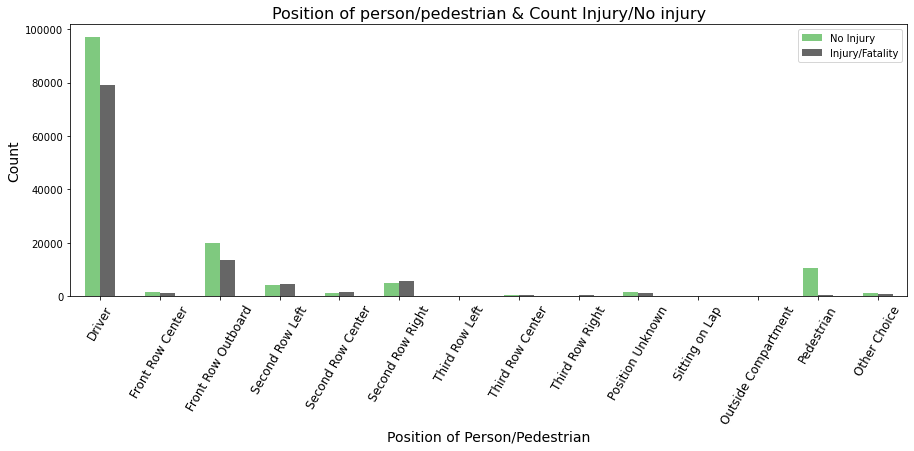

In [99]:
#Position of person in the vehicle/pedestrian and count of Injury/No injury

plot_cat_feature(pd.crosstab(index=data['P_PSN1'], columns=data['P_ISEV']),\
                 "Position of person/pedestrian & Count Injury/No injury", "Position of Person/Pedestrian","Count")
plt.xticks(list(range(data['P_PSN1'].nunique())), labels=['Driver','Front Row Center','Front Row Outboard',
            'Second Row Left','Second Row Center','Second Row Right','Third Row Left','Third Row Center',
                'Third Row Right','Position Unknown','Sitting on Lap','Outside Compartment',
                    'Pedestrian','Other Choice'], rotation=60, fontsize=12);

In [289]:
pd.crosstab(index=data['P_PSN1'], columns=data['P_ISEV'])

P_ISEV,0,1
P_PSN1,,
11,96778,70635
12,1499,1188
13,19726,13484
21,4133,4729
22,1219,1547
23,4775,5800
31,139,195
32,388,550
33,169,256


P_USER: Person involved in collision. Has < 3% null values. We will impute null values as follows:
if v_type1=17, p_user = 4 bicyclist,
if v_type1 = 14, p_user = 5 motorbike,
if v_type1 = 24, p_user = 3 pedestrian,
if p_psn1 = 11, p_user =1 motor-vehicle driver,
else null values of p_user will be imputed with 2 motor-vehicle passenger.
Change type to 'object'.

In [100]:
data['P_USER'].value_counts(dropna=False)

1.0    163789
2.0     60801
3.0     10808
NaN      5997
5.0      5888
4.0      4657
Name: P_USER, dtype: int64

In [101]:
#data1[(data1['P_USER'].isnull()) & (data1['V_TYPE1']=='17')] #bicyclist no rows
#data1[(data1['P_USER'].isnull()) & (data1['V_TYPE1']=='14')] #motorbike no rows
#data1[(data1['P_USER'].isna()) & (data1['P_PSN1']=='11')] #driver 3263 rows
#data1[(data1['P_USER'].isna()) & (data1['V_TYPE1']=='24')] #pedestrians 0 records
#data1[(data1['P_USER'].isna()) & (data1['V_ID']==99)] #pedestrians 0 records
data[(data['P_USER'].isna()) & (data['P_PSN1']=='99')] #pedestrians 0 records

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE,C_CONF1,C_RCFG1,V_TYPE1,P_PSN1


In [102]:
data['P_USER1'] = np.select([(data['P_USER'].isnull()) & (data['V_TYPE1']=='17'), #bicyclist no rows
                             (data['P_USER'].isnull()) & (data['V_TYPE1']=='14'), #motorbike no rows
                             (data['P_USER'].isna()) & (data['V_TYPE1']=='24'), #pedestrians 0 records
                             (data['P_USER'].isna()) & (data['P_PSN1']=='11'), #driver 3263 rows
                             data['P_USER'].isna()], #impute these as 2 vehicle passenger
                             [4, 5, 3, 1, 2],
                            default = data['P_USER'])

data['P_USER1'] = data['P_USER1'].astype('int').astype('object')

In [103]:
#check counts after update

data['P_USER1'].value_counts(dropna=False)

1    167052
2     63535
3     10808
5      5888
4      4657
Name: P_USER1, dtype: int64

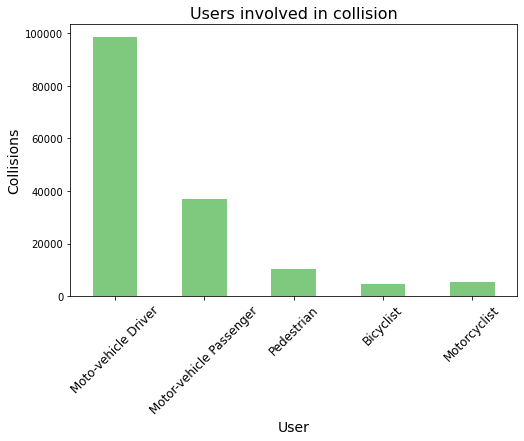

In [104]:
plot_bar(data.groupby(['P_USER1'])['C_CASE'].nunique(), "Users involved in collision", 'User', 'Collisions')
plt.xticks([0,1,2,3,4], 
           labels=['Moto-vehicle Driver','Motor-vehicle Passenger','Pedestrian','Bicyclist','Motorcyclist'],
          rotation=45, fontsize=12);

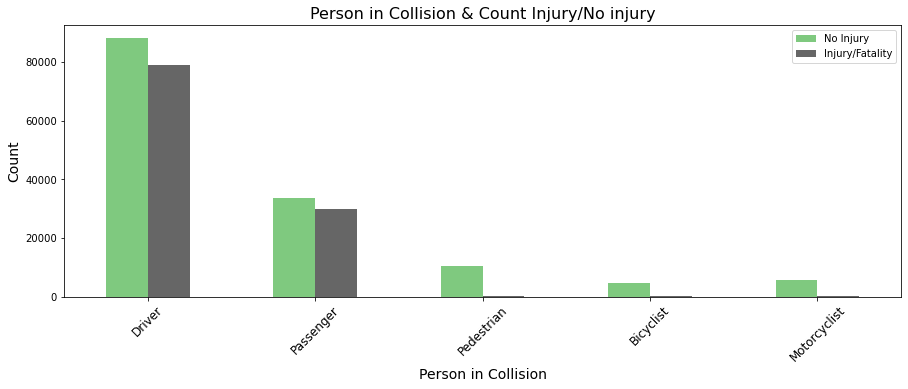

In [105]:
#Person in Collision and count of Injury/No injury

plot_cat_feature(pd.crosstab(index=data['P_USER1'], columns=data['P_ISEV']),\
                 "Person in Collision & Count Injury/No injury", "Person in Collision","Count")
plt.xticks(list(range(data['P_USER1'].nunique())), labels=['Driver','Passenger','Pedestrian','Bicyclist',\
                                                          'Motorcyclist'], rotation=45, fontsize=12);

In [106]:
pd.crosstab(index=data['P_USER1'], columns=data['P_ISEV'])

P_ISEV,0,1
P_USER1,,
1,88250,78802
2,33691,29844
3,10565,243
4,4478,179
5,5575,313


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251940 entries, 0 to 272300
Data columns (total 28 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   C_YEAR   251940 non-null  int64  
 1   C_MNTH   251940 non-null  int64  
 2   C_WDAY   251940 non-null  int64  
 3   C_HOUR   251940 non-null  int64  
 4   C_SEV    251940 non-null  int64  
 5   C_VEHS   251940 non-null  int64  
 6   C_CONF   243909 non-null  object 
 7   C_RCFG   238296 non-null  object 
 8   C_WTHR   251940 non-null  object 
 9   C_RSUR   251940 non-null  object 
 10  C_RALN   251940 non-null  object 
 11  C_TRAF   251940 non-null  object 
 12  V_ID     251937 non-null  float64
 13  V_TYPE   250624 non-null  object 
 14  V_YEAR   242381 non-null  object 
 15  P_ID     251927 non-null  object 
 16  P_SEX    251940 non-null  object 
 17  P_AGE    243844 non-null  object 
 18  P_PSN    251158 non-null  object 
 19  P_ISEV   251940 non-null  int64  
 20  P_SAFE   227633 non-null  

P_AGE: Age of person involved in collision. Has 3% null values. We will impute null values with the mode age in each user category P_USER. Convert the column to int. Bin ages and create a new categorical column.

In [108]:
data['P_AGE'].value_counts(dropna=False) #imputing with median of 37 might not be appropriate as ages from 31 to 39 
#have 3800 to 4500 records whereas age range from 18 to 29 have 4700 to 5500 records. Imputing 8000 null entries
#with value 37 will make the the value for age 37 spike above 10k. 

NaN    8096
19     5582
21     5562
20     5506
18     5496
       ... 
98       24
95       21
97       18
96       17
99       14
Name: P_AGE, Length: 100, dtype: int64

In [109]:
data[data['P_AGE'].isin(['XX','NN'])] #no records for parked cars or XX

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE,C_CONF1,C_RCFG1,V_TYPE1,P_PSN1,P_USER1


In [110]:
data[data['P_USER1']==1].groupby(['P_USER1','P_AGE'])['P_AGE'].count()

P_USER1  P_AGE
1        1        41
         10        9
         11       14
         12       16
         13       25
                  ..
         95       11
         96        4
         97        4
         98        4
         99        1
Name: P_AGE, Length: 99, dtype: int64

For p_user=1 motor-vehicle driver, we see that there are entries for ages 1. For these records the value for p_user might have been wrongly input as driver. We will update p_user1=2 motor-vehicle passenger for these records.

In [111]:
#user= driver and age=1. 41 records wrongly marked as p_user as 'driver', change these to p_user1=2 vehicle passenger

data[(data['P_USER1']==1) & (data['P_AGE']=='1')]['P_AGE'].count()

41

In [112]:
#update p_user1=2 for 41 records for which person age=1 and p_user1=driver

data['P_USER1'] = np.where((data['P_USER1']==1) & (data['P_AGE']=='1'), 2, data['P_USER1'])

In [113]:
#Check the ages and mode age in each P_USER1 category

for user in [1,2,3,4,5]:
    print(data[data['P_USER1']==user].groupby(['P_USER1','P_AGE'])['P_AGE'].agg('count').\
          sort_values(ascending=False).head(10))
    print("Mode for p_user %s is :" %user, data[data['P_USER1']==user]['P_AGE'].mode()[0], '\n')

P_USER1  P_AGE
1        23       3817
         24       3784
         21       3738
         26       3729
         22       3708
         25       3674
         27       3647
         20       3620
         19       3602
         18       3444
Name: P_AGE, dtype: int64
Mode for p_user 1 is : 23 

P_USER1  P_AGE
2        1        2523
         17       1776
         18       1701
         19       1595
         16       1588
         20       1520
         21       1397
         22       1312
         15       1293
         23       1220
Name: P_AGE, dtype: int64
Mode for p_user 2 is : 1 

P_USER1  P_AGE
3        19       240
         21       227
         22       223
         18       221
         23       217
         25       214
         24       206
         20       203
         26       202
         17       196
Name: P_AGE, dtype: int64
Mode for p_user 3 is : 19 

P_USER1  P_AGE
4        25       115
         15       113
         14       112
         16       112
         13

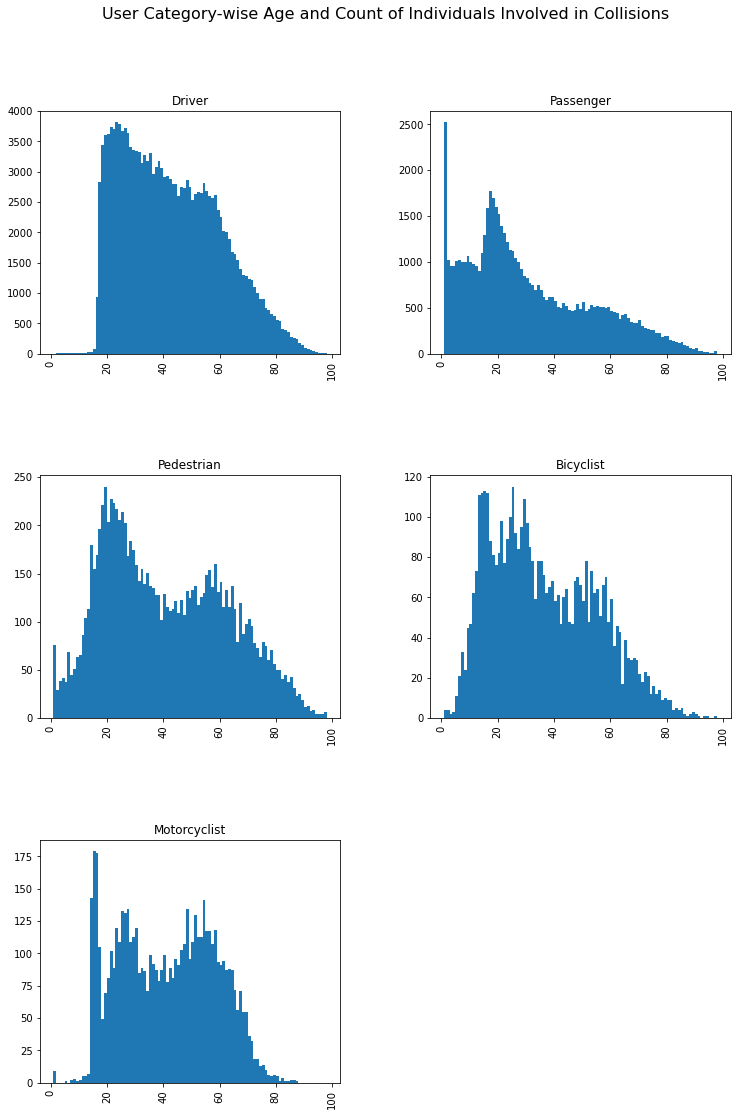

In [115]:
#Visualize age-wise counts for each user category before imputing age null values

data[~data['P_AGE'].isnull()]['P_AGE'].astype('int').hist(by = data['P_USER1'], figsize=(12,18),
                        bins=range(min(data[~data['P_AGE'].isnull()]['P_AGE'].astype('int')),
                                  max(data[~data['P_AGE'].isnull()]['P_AGE'].astype('int'))))

'''data1[~data1['P_AGE'].isnull()][['P_AGE','P_USER1']].astype('int').hist(column='P_AGE',
                                        by='P_USER1', figsize=(12,18) )'''

plt.suptitle('User Category-wise Age and Count of Individuals Involved in Collisions', fontsize=16)

#ax[0, 0] = plt.subplot(3,2,1)
plt.subplot(3,2,1)
plt.title("Driver")

#ax[0, 1] = plt.subplot(3,2,2)
plt.subplot(3,2,2)
plt.title("Passenger")

#ax[1, 0] = plt.subplot(3,2,3)
plt.subplot(3,2,3)
plt.title("Pedestrian")

#ax[1, 1] = plt.subplot(3,2,4)
plt.subplot(3,2,4)
plt.title("Bicyclist")

#ax[2, 0] = plt.subplot(3,2,5)
plt.subplot(3,2,5)
plt.title("Motorcyclist")
plt.show()

import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

In [116]:
# User-wise count for records with null age values

data[data['P_AGE'].isnull()]['P_USER1'].value_counts(dropna=False)

1    3717
2    3587
3     560
4     181
5      51
Name: P_USER1, dtype: int64

In [117]:
#update records with age as null with the mode age in each user category

data['P_AGE1'] =  np.select([(data['P_AGE'].isnull()) & (data['P_USER1']==1), 
                              (data['P_AGE'].isnull()) & (data['P_USER1']==2), 
                              (data['P_AGE'].isnull()) & (data['P_USER1']==3), 
                              (data['P_AGE'].isnull()) & (data['P_USER1']==4),
                              (data['P_AGE'].isnull()) & (data['P_USER1']==5)], 
                             [data[data['P_USER1']==1]['P_AGE'].mode()[0], 
                              data[data['P_USER1']==2]['P_AGE'].mode()[0],
                              data[data['P_USER1']==3]['P_AGE'].mode()[0], 
                              data[data['P_USER1']==4]['P_AGE'].mode()[0],
                              data[data['P_USER1']==5]['P_AGE'].mode()[0]], 
                             default= data['P_AGE'])
#data1[data1['P_USER1']==1]['P_AGE'].mode()[0]

data['P_AGE1'] = data['P_AGE1'].astype('int')

In [118]:
data['P_AGE1'].isnull().sum()

0

In [120]:
#Visualize age-wise counts for each user category
'''
data['P_AGE1'].hist(by = data['P_USER1'], figsize=(12,18), bins=range(min(data['P_AGE1']),max(data['P_AGE1'])))

#data1[~data1['P_AGE'].isnull()][['P_AGE','P_USER1']].astype('int').hist(column='P_AGE',
                                       # by='P_USER1', figsize=(12,18) )

plt.suptitle('User Category-wise Age and Count of Individuals Involved in Collisions', fontsize=16)

#ax[0, 0 ] = plt.subplot(3,2,1)
plt.subplot(3,2,1)
plt.title("Driver")

#ax[0, 1] = plt.subplot(3,2,2)
plt.subplot(3,2,2)
plt.title("Passenger")

#ax[1, 0] = plt.subplot(3,2,3)
plt.subplot(3,2,3)
plt.title("Pedestrian")

#ax[1, 1] = plt.subplot(3,2,4)
plt.subplot(3,2,4)
plt.title("Bicyclist")

#ax[2, 0] = plt.subplot(3,2,5)
plt.subplot(3,2,5)
plt.title("Motorcyclist")
plt.show()

import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)'''

'\ndata[\'P_AGE1\'].hist(by = data[\'P_USER1\'], figsize=(12,18), bins=range(min(data[\'P_AGE1\']),max(data[\'P_AGE1\'])))\n\n#data1[~data1[\'P_AGE\'].isnull()][[\'P_AGE\',\'P_USER1\']].astype(\'int\').hist(column=\'P_AGE\',\n                                       # by=\'P_USER1\', figsize=(12,18) )\n\nplt.suptitle(\'User Category-wise Age and Count of Individuals Involved in Collisions\', fontsize=16)\n\n#ax[0, 0 ] = plt.subplot(3,2,1)\nplt.subplot(3,2,1)\nplt.title("Driver")\n\n#ax[0, 1] = plt.subplot(3,2,2)\nplt.subplot(3,2,2)\nplt.title("Passenger")\n\n#ax[1, 0] = plt.subplot(3,2,3)\nplt.subplot(3,2,3)\nplt.title("Pedestrian")\n\n#ax[1, 1] = plt.subplot(3,2,4)\nplt.subplot(3,2,4)\nplt.title("Bicyclist")\n\n#ax[2, 0] = plt.subplot(3,2,5)\nplt.subplot(3,2,5)\nplt.title("Motorcyclist")\nplt.show()\n\nimport warnings\nfrom matplotlib import MatplotlibDeprecationWarning\nwarnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)'

In [121]:
#Unique values in age and c_vehs

print("Unique values in Age: ", data['P_AGE1'].nunique())
print("Unique values in number of vehicles involved in collision: ", data['C_VEHS'].nunique())

Unique values in Age:  99
Unique values in number of vehicles involved in collision:  29


In [122]:
data['C_VEHS'].value_counts()

2     152311
1      54751
3      31983
4       8274
5       2235
6        821
7        319
8        194
10       156
13        97
38        78
16        72
59        63
9         60
12        59
18        57
11        52
25        45
15        43
20        40
33        38
70        32
14        29
27        28
17        26
23        25
24        25
45        16
28        11
Name: C_VEHS, dtype: int64

In [123]:
#Create bins for age1
#Categories (9, interval[int64]): [(0, 15] < (15, 25] < (25, 35] < (35, 45] ... (55, 65] < (65, 75]
#< (75, 85] < (85, 100]]

b = [0,15,25,35,45,55,65,75,85,100]
l = [1,2,3,4,5,6,7,8,9]

data['P_AGE_CAT'] = pd.cut(data['P_AGE1'], bins=b, labels=l, right=True)
data['P_AGE_CAT'].value_counts(dropna=False)

2    56047
3    45518
4    37445
5    35202
6    29000
1    22865
7    16475
8     7581
9     1807
Name: P_AGE_CAT, dtype: int64

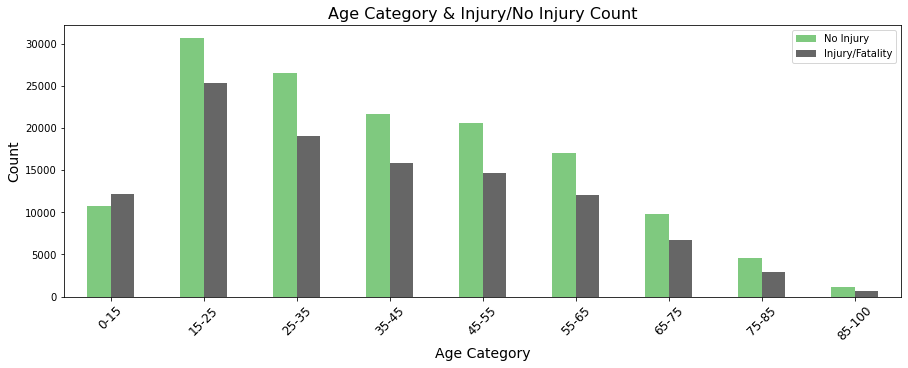

In [124]:
#Age category and count of Injury/No injury

plot_cat_feature(pd.crosstab(index=data['P_AGE_CAT'], columns=data['P_ISEV']),\
                 "Age Category & Injury/No Injury Count", "Age Category","Count")
plt.xticks(list(range(data['P_AGE_CAT'].nunique())), labels=['0-15','15-25','25-35','35-45','45-55','55-65',\
                                    '65-75','75-85','85-100'], rotation=45, fontsize=12);

P_SAFE: Drop entries with p_safe='NN' which is for parked cars. Impute mode of p_safe for v_id=99(pedestrian) and v_id!=99 separately

In [125]:
data['P_SAFE'].value_counts(dropna=False)

2      189794
NaN     24307
NN      14070
1        6810
9        6548
12       3988
QQ       3300
13       3043
10         80
Name: P_SAFE, dtype: int64

In [126]:
#Drop rows with values as 'NN' for parked cars

data.drop(data[data['P_SAFE']=='NN'].index, inplace=True)

In [127]:
mode1 = data[(data['V_ID']==99) & (~data['P_SAFE'].isna())]['P_SAFE'].mode()[0] #'1'
mode2 = data[(data['V_ID']!=99) & (~data['P_SAFE'].isna())]['P_SAFE'].mode()[0] #'2'

data['P_SAFE1'] = np.select([(data['V_ID']==99) & (data['P_SAFE'].isna()), 
                             (data['V_ID']!=99) & (data['P_SAFE'].isna())],
                            [mode1, mode2], default=data['P_SAFE'])

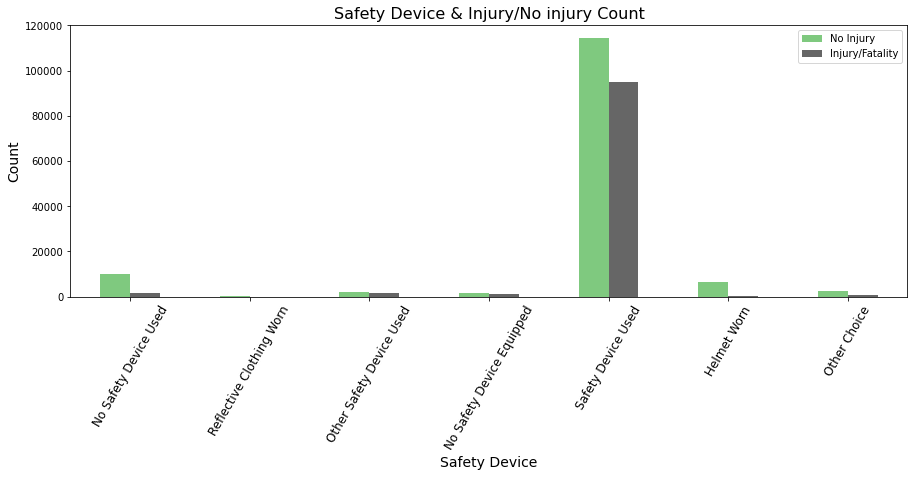

In [128]:
#Safety device status of the person in collision and count of Injury/No injury

plot_cat_feature(pd.crosstab(index=data['P_SAFE1'], columns=data['P_ISEV']),\
                 "Safety Device & Injury/No injury Count", "Safety Device","Count")
plt.xticks(list(range(data['P_SAFE1'].nunique())), labels=['No Safety Device Used','Reflective Clothing Worn',
                'Other Safety Device Used','No Safety Device Equipped','Safety Device Used','Helmet Worn',
                            'Other Choice'], rotation=60, fontsize=12);

In [129]:
pd.crosstab(index=data['P_SAFE1'], columns=data['P_ISEV'])

P_ISEV,0,1
P_SAFE1,,
1,9860,1422
10,80,0
12,2228,1760
13,1724,1319
2,114549,95080
9,6325,223
QQ,2467,833


Columns we will drop from ML - C_YEAR(year data is collected), C_SEV (severity of the collision), V_ID (vehicle sequence number), V_YEAR (model year of the vehicle), P_ID(sequence number for individual involved in collision),
C_CASE (case identifier for the collision)

In [130]:
#Create a copy of data with all the features we will be using

df_copy = data[['C_MNTH', 'C_WDAY','C_HOUR','C_VEHS','C_CONF1','C_RCFG1','C_WTHR','C_RSUR','C_RALN','C_TRAF',\
               'V_TYPE1','P_SEX','P_AGE_CAT','P_PSN1','P_ISEV','P_SAFE1','P_USER1']].copy()

In [131]:
#Check for null values and 'NN' values

pd.DataFrame(data=[df_copy.isna().sum(), df_copy.isna().sum()*100/df_copy.shape[0],df_copy.isin(['NN']).sum()],
            index=['Null#','Null%','NN#']).T.sort_values(by='Null#', ascending=False)

,Null#,Null%,NN#
C_MNTH,0.0,0.0,0.0
C_TRAF,0.0,0.0,0.0
P_SAFE1,0.0,0.0,0.0
P_ISEV,0.0,0.0,0.0
P_PSN1,0.0,0.0,0.0
P_AGE_CAT,0.0,0.0,0.0
P_SEX,0.0,0.0,0.0
V_TYPE1,0.0,0.0,0.0
C_RALN,0.0,0.0,0.0
C_WDAY,0.0,0.0,0.0


In [132]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237870 entries, 0 to 272299
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   C_MNTH     237870 non-null  int64   
 1   C_WDAY     237870 non-null  int64   
 2   C_HOUR     237870 non-null  int64   
 3   C_VEHS     237870 non-null  int64   
 4   C_CONF1    237870 non-null  object  
 5   C_RCFG1    237870 non-null  object  
 6   C_WTHR     237870 non-null  object  
 7   C_RSUR     237870 non-null  object  
 8   C_RALN     237870 non-null  object  
 9   C_TRAF     237870 non-null  object  
 10  V_TYPE1    237870 non-null  object  
 11  P_SEX      237870 non-null  object  
 12  P_AGE_CAT  237870 non-null  category
 13  P_PSN1     237870 non-null  object  
 14  P_ISEV     237870 non-null  int64   
 15  P_SAFE1    237870 non-null  object  
 16  P_USER1    237870 non-null  object  
dtypes: category(1), int64(5), object(11)
memory usage: 31.1+ MB


### Cyclical encoding for month/day/time

In [133]:
# cyclical transformation of time based features

def cyclic_transform(column):
    max_value = column.max()
    sin_values = [math.sin((2*math.pi*x)/max_value) for x in list(column)]
    cos_values = [math.cos((2*math.pi*x)/max_value) for x in list(column)]
    return sin_values, cos_values

In [134]:
df_copy['month_sin'], df_copy['month_cos'] = cyclic_transform(df_copy['C_MNTH'])
df_copy['day_sin'], df_copy['day_cos'] = cyclic_transform(df_copy['C_WDAY'])
df_copy['time_sin'], df_copy['time_cos'] = cyclic_transform(df_copy['C_HOUR'])

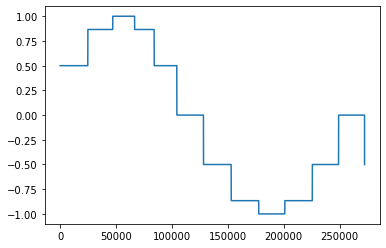

In [135]:
df_copy['month_sin'].plot();

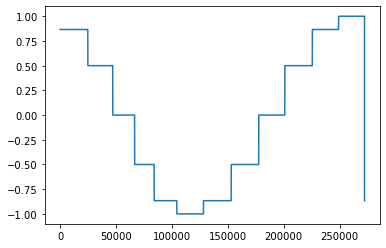

In [136]:
df_copy['month_cos'].plot();

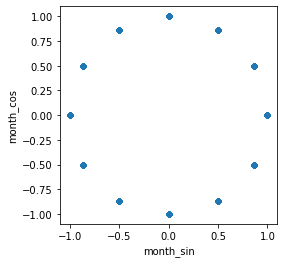

In [137]:
df_copy.plot(kind='scatter',x='month_sin',y='month_cos').set_aspect('equal');

In [138]:
#Dataframe with features for ML

df = df_copy[['C_VEHS','C_CONF1','C_RCFG1','C_WTHR','C_RSUR','C_RALN','C_TRAF','V_TYPE1','P_SEX','P_AGE_CAT',\
              'P_PSN1','P_ISEV','P_SAFE1','P_USER1','month_sin', 'month_cos', 'day_sin', 'day_cos', \
              'time_sin', 'time_cos']]
df.dtypes

C_VEHS          int64
C_CONF1        object
C_RCFG1        object
C_WTHR         object
C_RSUR         object
C_RALN         object
C_TRAF         object
V_TYPE1        object
P_SEX          object
P_AGE_CAT    category
P_PSN1         object
P_ISEV          int64
P_SAFE1        object
P_USER1        object
month_sin     float64
month_cos     float64
day_sin       float64
day_cos       float64
time_sin      float64
time_cos      float64
dtype: object

In [586]:
#Write the final data frame to a file to use for neural network training

#df.to_csv("DataforML.csv")

In [139]:
print("Numerical columns: ", df.select_dtypes(include=[np.number]).drop(['P_ISEV'], axis=1).columns)
print("Categorical columns: ", df.select_dtypes(exclude=[np.number]).columns)

Numerical columns:  Index(['C_VEHS', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'time_sin',
       'time_cos'],
      dtype='object')
Categorical columns:  Index(['C_CONF1', 'C_RCFG1', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_TYPE1',
       'P_SEX', 'P_AGE_CAT', 'P_PSN1', 'P_SAFE1', 'P_USER1'],
      dtype='object')


In [140]:
Target = 'P_ISEV'
columns_pred = [col for col in df.columns if col not in [Target]]
columns_num = list(df.select_dtypes(include=[np.number]).drop(Target, axis=1).columns)
columns_cat = list(df.select_dtypes(exclude=[np.number]).columns)

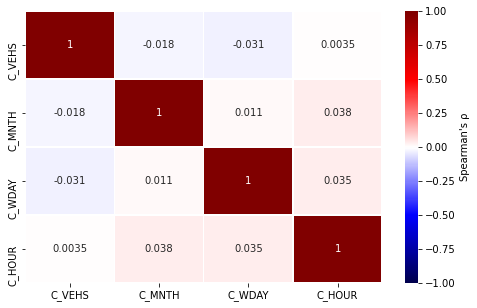

In [148]:
#Correlation for numerical features

plt.figure(figsize=(8,5))
           
sns.heatmap(df_copy[['C_VEHS','C_MNTH', 'C_WDAY','C_HOUR']].corr(method='spearman'), cmap='seismic', vmin=-1, vmax=1, annot=True,\
           linewidths=.5, cbar_kws={"label": "Spearman's ρ"});

Relation of the numerical features (age and number of vehicles involved in the collision) to the target variable.

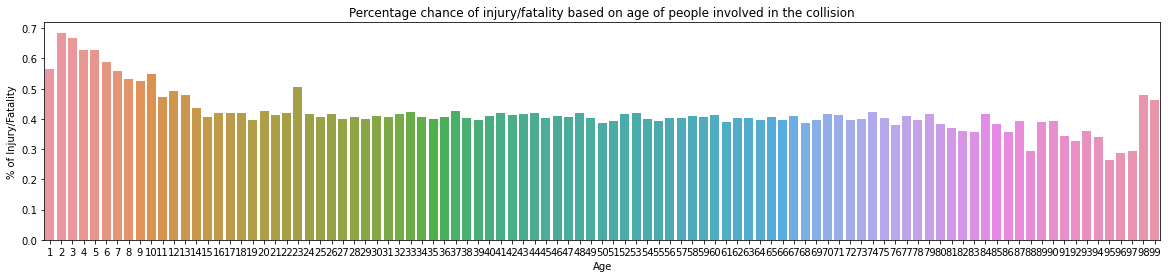

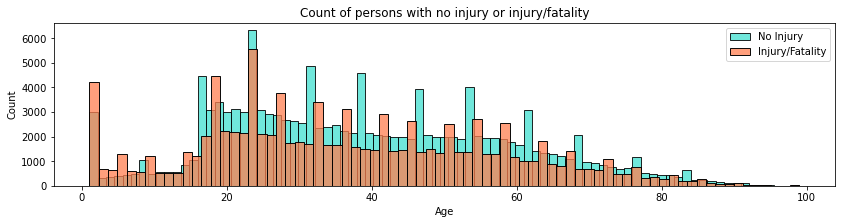

In [149]:
#Percentage chance of injury/fatality based on age of persons involved in the collision

plt.figure(figsize=(20,4))
vehs_pivot = data.groupby(['P_AGE1'])['P_ISEV'].mean().reset_index()
sns.barplot(x=vehs_pivot['P_AGE1'], y=vehs_pivot['P_ISEV'])
plt.title("Percentage chance of injury/fatality based on age of people involved in the collision")
plt.xlabel("Age")
plt.ylabel("% of Injury/Fatality")
plt.show()

plt.figure(figsize=(14,3))
sns.histplot(data[data['P_ISEV']==0]['P_AGE1'], color='turquoise', label='No Injury')
sns.histplot(data[data['P_ISEV']==1]['P_AGE1'], color='coral', label='Injury/Fatality')
plt.legend()
plt.title("Count of persons with no injury or injury/fatality" )
plt.xlabel("Age")
plt.show()

In [150]:
#data.groupby(['C_VEHS'])['P_ISEV'].count().reset_index()
pd.crosstab(index=data['C_VEHS'], columns=data['P_ISEV']).reset_index()#.info()

P_ISEV,C_VEHS,0,1
0,1,35667,12659
1,2,82518,64308
2,3,14166,16420
3,4,3226,4614
4,5,790,1282
5,6,293,486
6,7,108,187
7,8,76,110
8,9,19,40
9,10,56,86


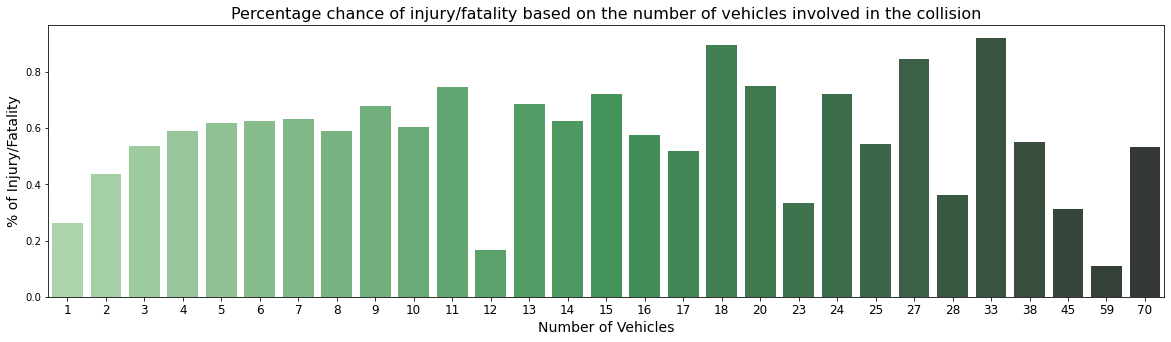

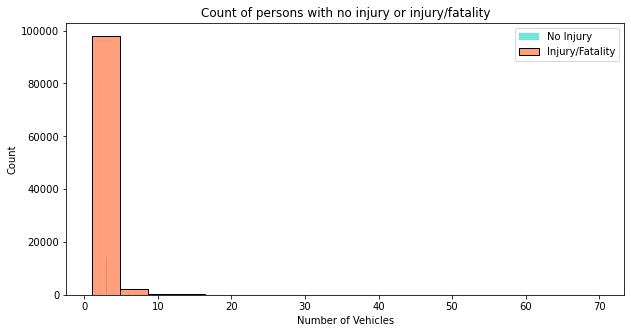

In [154]:
#Percentage chance of injury/fatality based on the number of vehicles involved in the collision

plt.figure(figsize=(20,5))
vehs_pivot = data.groupby(['C_VEHS'])['P_ISEV'].mean().reset_index()
sns.barplot(x=vehs_pivot['C_VEHS'], y=vehs_pivot['P_ISEV'], palette='Greens_d')
plt.title("Percentage chance of injury/fatality based on the number of vehicles involved in the collision",fontsize=16)
plt.xlabel("Number of Vehicles", fontsize=14)
plt.ylabel("% of Injury/Fatality", fontsize=14)
plt.xticks(fontsize=12)
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data[data['P_ISEV']==0]['C_VEHS'], color='turquoise', label='No Injury')
sns.histplot(data[data['P_ISEV']==1]['C_VEHS'], color='coral', label='Injury/Fatality')
plt.legend()
plt.title("Count of persons with no injury or injury/fatality" )
plt.xlabel("Number of Vehicles")
plt.show()

In [155]:
pd.crosstab(index=data['C_VEHS'], columns=data['P_ISEV']).head(10)

P_ISEV,0,1
C_VEHS,,
1,35667,12659
2,82518,64308
3,14166,16420
4,3226,4614
5,790,1282
6,293,486
7,108,187
8,76,110
9,19,40


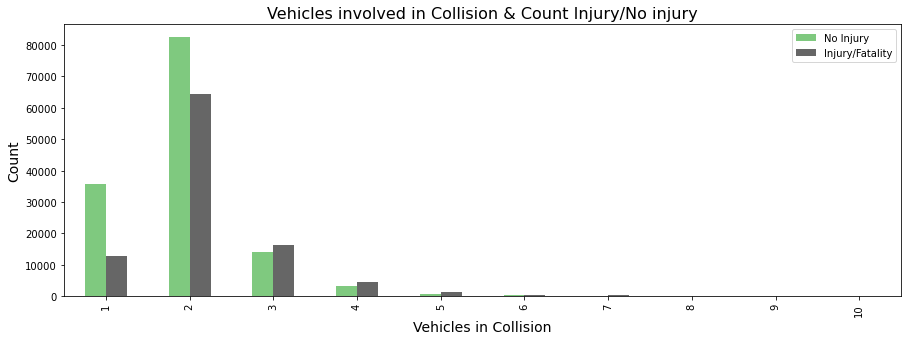

In [156]:
plot_cat_feature(pd.crosstab(index=data['C_VEHS'], columns=data['P_ISEV']).head(10),\
                 "Vehicles involved in Collision & Count Injury/No injury", "Vehicles in Collision","Count")

In [157]:
#Categorical columns and the number of unique categories with counts
#print(" Column name, value, count \n")

for col in columns_cat:
    if col == 'P_AGE_CAT': #this is category data type. Rest are object data type
        print("{}: ".format(col), dict(df[col].astype('object').value_counts()))
    else:    
        print("{}: ".format(col), dict(df[col].value_counts()))
    print("Categories in %s" %col, df[col].nunique(), '\n')

C_CONF1:  {'21': 77362, '35': 33372, '6': 22522, '36': 22169, '33': 17814, 'QQ': 12842, '4': 8810, '22': 7876, '31': 7794, '2': 6735, '3': 6060, '32': 2678, '23': 2668, '1': 2310, '24': 2070, '41': 1914, '34': 1344, '25': 838, '5': 692}
Categories in C_CONF1 19 

C_RCFG1:  {'2': 118291, '1': 100504, '3': 8301, 'QQ': 6877, '5': 2020, '8': 689, '4': 594, '6': 278, '9': 243, '10': 50, '7': 23}
Categories in C_RCFG1 11 

C_WTHR:  {'1': 173019, '2': 20793, '3': 19666, '4': 16530, '6': 4859, '5': 1631, '7': 835, 'Q': 537}
Categories in C_WTHR 8 

C_RSUR:  {'1': 159491, '2': 36946, '5': 15281, '3': 11358, 'Q': 10092, '4': 3746, '6': 739, '7': 150, '8': 39, '9': 28}
Categories in C_RSUR 10 

C_RALN:  {'1': 191346, '2': 18656, '3': 14810, '4': 7242, '5': 2971, '6': 2379, 'Q': 466}
Categories in C_RALN 7 

C_TRAF:  {'18': 129489, '1': 68369, '3': 27553, '4': 4133, 'QQ': 3801, '6': 1682, '2': 875, '8': 669, '12': 368, '11': 247, '13': 135, '17': 128, '15': 121, '5': 85, '16': 76, '10': 73, '7': 4

We have 12 categorical features and each feature having 5 or more categories. Total number of categories for all the features is 129. One hot encoding for categorical features will result in a large number of dummy attributes or input features leading to curse of dimensionality. This will slow down training and performance. Therefore we will do chi-square test for feature selection.
We will assess if there is a significant association/relationship between the 2 categorical variables, every independent feature with the dependant feature p_isev.

### Chi-square test for feature selection

$H_0$: The 2 categorical variables are independant. i.e there is no relation between the 2 sets of data.

$H_a$: The 2 categorical variables are dependant. i.e. there is a relation between the 2 sets of data.

In [158]:
#Chi-square test for categorical variables that are related to the target variable p_isev

X_cat_fs = pd.get_dummies(df[columns_cat])
y = df[Target]

selector = SelectKBest(score_func = chi2, k=30)
selector.fit(X_cat_fs, y)

df_scores = pd.DataFrame(data=selector.scores_, index=X_cat_fs.columns, columns=['Scores'])
pd.set_option('display.max_rows', None)
df_scores.sort_values('Scores', ascending=False)

,Scores
P_SAFE1_1,4078.138397
P_SAFE1_9,4059.890881
P_USER1_3,3719.102435
V_TYPE1_24,3719.102435
P_PSN1_99,3719.102435
P_USER1_5,3349.784298
V_TYPE1_14,3349.784298
P_USER1_4,3064.010887
V_TYPE1_17,3064.010887
C_CONF1_4,3029.349476


In [159]:
pd.set_option('display.max_rows', 20)

In [160]:
selector.n_features_in_

129

### Mutual info classif

Estimate mututal information between variables. It is equal to 0 if and only if two random variables are independent, higher values mean higher dependency.

In [161]:
#Estimate mutual information for a discrete target variable. Returns mutual info between each feature and the 
#target

X_num_fs = df[columns_num]
mutual_info = mutual_info_classif(X_num_fs, y)

pd.DataFrame(data = mutual_info, index=X_num_fs.columns, columns=['mi'] ).sort_values(by='mi', ascending=False)

,mi
C_VEHS,0.030113
time_sin,0.003708
month_sin,0.003493
day_cos,0.002853
month_cos,0.002491
time_cos,0.001862
day_sin,0.000000


Mututal information is a non-negative value and measures the dependency between the numberic variable and the target variable. It is equal to zero if and only if two variables are independent. Higher values mean higher dependency.

### Train test split

In [162]:
X = df[columns_pred]
y = df[Target]

In [163]:
#Stratify split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("X train shape: ", X_train.shape)
print("X test shape: ", X_test.shape)
print("y train shape: ", y_train.shape)
print("y test shape: ", y_test.shape)

X train shape:  (166509, 19)
X test shape:  (71361, 19)
y train shape:  (166509,)
y test shape:  (71361,)


### Pipeline

In [164]:
#Pipeline for categorical features

pipe_cat = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore')),
                            ('select', SelectKBest(score_func = chi2, k='all')),
                            ])

#Pipeline for numerical features

pipe_num = Pipeline(steps=[('scaler', StandardScaler()),
                          ])


#Pre-processing pipeline to combine both categorical+numerical features

pipe_preprocessor = ColumnTransformer([('categorical', pipe_cat, columns_cat),
                               ('numerical', pipe_num , columns_num),
                               ])

#Use combined features  for the train data and transform both train and test sets

X_train_transformed = pipe_preprocessor.fit(X_train, y_train).transform(X_train) #SelectKbest uses fit(X,y)

#Transform the test set

X_test_transformed = pipe_preprocessor.transform(X_test)

In [165]:
X_train_transformed = pipe_preprocessor.transform(X_train)
X_test_transformed = pipe_preprocessor.transform(X_test)

In [166]:
X_train_transformed.shape, X_test_transformed.shape #35+7numerical=42

((166509, 136), (71361, 136))

In [167]:
#property name_transformers_ : access the fitted transformers by name
pipe_preprocessor.named_transformers_

{'categorical': Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore')),
                 ('select',
                  SelectKBest(k='all',
                              score_func=<function chi2 at 0x7f78a800f3a0>))]),
 'numerical': Pipeline(steps=[('scaler', StandardScaler())])}

In [168]:
#Get the column names after one-hot encoding Total 129 columns

pipe_preprocessor.named_transformers_['categorical'].named_steps['onehot'].get_feature_names(columns_cat)

array(['C_CONF1_1', 'C_CONF1_2', 'C_CONF1_21', 'C_CONF1_22', 'C_CONF1_23',
       'C_CONF1_24', 'C_CONF1_25', 'C_CONF1_3', 'C_CONF1_31',
       'C_CONF1_32', 'C_CONF1_33', 'C_CONF1_34', 'C_CONF1_35',
       'C_CONF1_36', 'C_CONF1_4', 'C_CONF1_41', 'C_CONF1_5', 'C_CONF1_6',
       'C_CONF1_QQ', 'C_RCFG1_1', 'C_RCFG1_10', 'C_RCFG1_2', 'C_RCFG1_3',
       'C_RCFG1_4', 'C_RCFG1_5', 'C_RCFG1_6', 'C_RCFG1_7', 'C_RCFG1_8',
       'C_RCFG1_9', 'C_RCFG1_QQ', 'C_WTHR_1', 'C_WTHR_2', 'C_WTHR_3',
       'C_WTHR_4', 'C_WTHR_5', 'C_WTHR_6', 'C_WTHR_7', 'C_WTHR_Q',
       'C_RSUR_1', 'C_RSUR_2', 'C_RSUR_3', 'C_RSUR_4', 'C_RSUR_5',
       'C_RSUR_6', 'C_RSUR_7', 'C_RSUR_8', 'C_RSUR_9', 'C_RSUR_Q',
       'C_RALN_1', 'C_RALN_2', 'C_RALN_3', 'C_RALN_4', 'C_RALN_5',
       'C_RALN_6', 'C_RALN_Q', 'C_TRAF_1', 'C_TRAF_10', 'C_TRAF_11',
       'C_TRAF_12', 'C_TRAF_13', 'C_TRAF_15', 'C_TRAF_16', 'C_TRAF_17',
       'C_TRAF_18', 'C_TRAF_2', 'C_TRAF_3', 'C_TRAF_4', 'C_TRAF_5',
       'C_TRAF_6', 'C_TRAF_7', 'C

## Training models

### Stochastic Gradient Descent (SGD) Classifier

In [169]:
#Append a classifier to the preprocessing pipeline to get a full prediction pipeline

clf1 = Pipeline([('preprocessor', pipe_preprocessor),
                   ('sgd_clf', SGDClassifier(loss='log', learning_rate='optimal', random_state=42))
                ]) #log loss gives a logistic probablistic classifier

param_grid = {'preprocessor__categorical__select__k': [25, 30, 35, 40],
              #'sgd_clf__loss': ['log','modified_huber'],
              'sgd_clf__alpha': [0.00001, 0.0001, 0.001, 0.0015, 0.01, 0.1, 0.2] 
             } #higher alpha stronger the regularization

t0 = time.time()
search_sgd = GridSearchCV(clf1, param_grid=param_grid, cv=5, n_jobs=-1, scoring = 'roc_auc')
search_sgd.fit(X_train, y_train)
t1 = time.time()

print("Training took {:.2f}s".format(t1-t0))

Training took 29.29s


In [170]:
search_sgd.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('select',
                                                                   SelectKBest(k=40,
                                                                               score_func=<function chi2 at 0x7f78a800f3a0>))]),
                                                  ['C_CONF1', 'C_RCFG1',
                                                   'C_WTHR', 'C_RSUR', 'C_RALN',
                                                   'C_TRAF', 'V_TYPE1', 'P_SEX',
                                                   'P_AGE_CAT', 'P_PSN1',
                                                   'P_SAFE1', 'P_USER1']),
                                          

In [171]:
# mean roc_auc_scores for each set of params

for score, params in zip(search_sgd.cv_results_['mean_test_score'], search_sgd.cv_results_['params']):
    print(score, params)

0.6862059627413102 {'preprocessor__categorical__select__k': 25, 'sgd_clf__alpha': 1e-05}
0.6986500062858203 {'preprocessor__categorical__select__k': 25, 'sgd_clf__alpha': 0.0001}
0.7008593786773835 {'preprocessor__categorical__select__k': 25, 'sgd_clf__alpha': 0.001}
0.700420239860118 {'preprocessor__categorical__select__k': 25, 'sgd_clf__alpha': 0.0015}
0.692359700748094 {'preprocessor__categorical__select__k': 25, 'sgd_clf__alpha': 0.01}
0.6783410151097273 {'preprocessor__categorical__select__k': 25, 'sgd_clf__alpha': 0.1}
0.6740366653365234 {'preprocessor__categorical__select__k': 25, 'sgd_clf__alpha': 0.2}
0.6872861091076365 {'preprocessor__categorical__select__k': 30, 'sgd_clf__alpha': 1e-05}
0.7017405008411602 {'preprocessor__categorical__select__k': 30, 'sgd_clf__alpha': 0.0001}
0.7040207221011364 {'preprocessor__categorical__select__k': 30, 'sgd_clf__alpha': 0.001}
0.7034977556255793 {'preprocessor__categorical__select__k': 30, 'sgd_clf__alpha': 0.0015}
0.6953777397614649 {'pre

In [155]:
#get selected feature columns
'''
search_sgd.best_estimator_.named_steps['preprocessor'].named_transformers_['categorical'].\
named_steps['select'].get_feature_names_out()'''

"\nsearch_sgd.best_estimator_.named_steps['preprocessor'].named_transformers_['categorical'].named_steps['select'].get_feature_names_out()"

In [172]:
#best sgd estimator

sgd_model = search_sgd.best_estimator_
sgd_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('select',
                                                                   SelectKBest(k=40,
                                                                               score_func=<function chi2 at 0x7f78a800f3a0>))]),
                                                  ['C_CONF1', 'C_RCFG1',
                                                   'C_WTHR', 'C_RSUR', 'C_RALN',
                                                   'C_TRAF', 'V_TYPE1', 'P_SEX',
                                                   'P_AGE_CAT', 'P_PSN1',
                                                   'P_SAFE1', 'P_USER1']),
                                          

In [173]:
#roc auc for train date

sgd_train_pred = sgd_model.predict(X_train)
sgd_train_score = sgd_model.predict_proba(X_train)[: , 1]
sgd_train_roc_auc = roc_auc_score(y_train, sgd_train_score)
sgd_train_roc_auc

0.7082433481279337

In [174]:
#roc auc for test date

sgd_test_pred = sgd_model.predict(X_test)
sgd_test_score = sgd_model.predict_proba(X_test)[: , 1]
sgd_test_roc_auc = roc_auc_score(y_test, sgd_test_score)
sgd_test_roc_auc

0.7072765195585354

In [175]:
sgd_accuracy = accuracy_score(y_test, sgd_test_pred)
sgd_f1 = f1_score(y_test, sgd_test_pred)
sgd_precision = precision_score(y_test, sgd_test_pred)
sgd_recall = recall_score(y_test, sgd_test_pred)

print('Accuracy:',sgd_accuracy)
print('F1:',sgd_f1)
print('Precision:',sgd_precision)
print('Recall:',sgd_recall)

Accuracy: 0.6543910539370245
F1: 0.5681869911581896
Precision: 0.6026593373941465
Recall: 0.5374449339207048


In [176]:
#Function to print classifier metrics

def classifier_metrics(accuracy, f1, precision, recall):
    print('Accuracy:',accuracy)
    print('F1:', f1)
    print('Precision:',precision)
    print('Recall:',recall)

In [161]:
#sgd1 = sgd_model.decision_function(X_train)
#roc_auc_score(y_train, sgd1)

In [177]:
#Precision recall curve for test data
'''
precision, recall, thresholds = precision_recall_curve(y_test, sgd_model.decision_function(X_test))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()'''

'\nprecision, recall, thresholds = precision_recall_curve(y_test, sgd_model.decision_function(X_test))\nplt.plot(recall, precision)\nplt.xlabel("Recall")\nplt.ylabel("Precision")\nplt.show()'

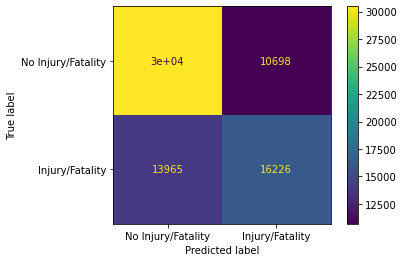

In [178]:
#Confusion matrix for test data

plot_confusion_matrix(sgd_model, X_test, y_test, display_labels=['No Injury/Fatality','Injury/Fatality'])

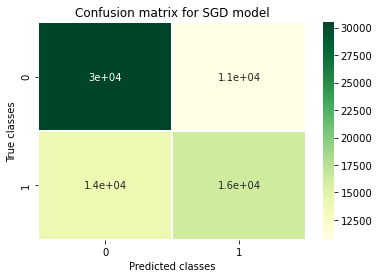

In [179]:
plt.title("Confusion matrix for SGD model")
sns.heatmap(confusion_matrix(y_test, sgd_test_pred), annot=True, cmap='YlGn', linewidth=0.5)
plt.xlabel("Predicted classes")
plt.ylabel("True classes")
plt.show()

### Logistic Regression

In [165]:
clf2 = Pipeline([('preprocessor', pipe_preprocessor),
               ('log_clf', LogisticRegression(solver='sag', random_state=42))
                ])

#sag & saga faster for large datasets. Default penalty is l2

param_grid = {'preprocessor__categorical__select__k': [25, 30, 35], 
             'log_clf__C': [0.1, 0.5, 1, 2, 3, 5, 10]}  #higher values of C less regularization

t0 = time.time()
search_log = GridSearchCV(clf2, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
search_log.fit(X_train, y_train)
t1 = time.time()


print("Training took {:.2f}s".format(t1-t0))

Training took 435.34s


/Users/Anna/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [166]:
search_log.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('select',
                                                                   SelectKBest(k=35,
                                                                               score_func=<function chi2 at 0x7fbff53b2040>))]),
                                                  ['C_CONF1', 'C_RCFG1',
                                                   'C_WTHR', 'C_RSUR', 'C_RALN',
                                                   'C_TRAF', 'V_TYPE1', 'P_SEX',
                                                   'P_AGE_CAT', 'P_PSN1',
                                                   'P_SAFE1', 'P_USER1']),
                                          

In [167]:
#Chck the mean roc auc score for the params

for score, params in zip(search_log.cv_results_['mean_test_score'], search_log.cv_results_['params']):
    print(score, params)


0.70119101130338 {'log_clf__C': 0.1, 'preprocessor__categorical__select__k': 25}
0.7044186960499943 {'log_clf__C': 0.1, 'preprocessor__categorical__select__k': 30}
0.7063856134229427 {'log_clf__C': 0.1, 'preprocessor__categorical__select__k': 35}
0.7011533187076671 {'log_clf__C': 0.5, 'preprocessor__categorical__select__k': 25}
0.7043937164496878 {'log_clf__C': 0.5, 'preprocessor__categorical__select__k': 30}
0.7063719301355181 {'log_clf__C': 0.5, 'preprocessor__categorical__select__k': 35}
0.7011473717522254 {'log_clf__C': 1, 'preprocessor__categorical__select__k': 25}
0.7043893676057635 {'log_clf__C': 1, 'preprocessor__categorical__select__k': 30}
0.7063693988803896 {'log_clf__C': 1, 'preprocessor__categorical__select__k': 35}
0.7011442327618618 {'log_clf__C': 2, 'preprocessor__categorical__select__k': 25}
0.7043869571144092 {'log_clf__C': 2, 'preprocessor__categorical__select__k': 30}
0.7063682573762973 {'log_clf__C': 2, 'preprocessor__categorical__select__k': 35}
0.7011430897663438

In [168]:
param_distributions = {'preprocessor__categorical__select__k': [30, 35],
    'log_clf__C' : uniform(loc=0, scale=2)}  #higher values of C less regularization

t0 = time.time()
rsearch_log = RandomizedSearchCV(clf2, param_distributions, cv=5, n_jobs=-1, scoring='roc_auc',
                                 n_iter=20, random_state=0) #n_iter=10 default
rsearch_log.fit(X_train, y_train) 
t1 = time.time()


print("Training took {:.2f}s".format(t1-t0))

Training took 549.98s


/Users/Anna/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [169]:
#Chck the mean roc auc score for the params

for score, params in zip(rsearch_log.cv_results_['mean_test_score'], rsearch_log.cv_results_['params']):
    print(score, params)


0.7063692684806551 {'log_clf__C': 1.0976270078546495, 'preprocessor__categorical__select__k': 35}
0.7063683493572017 {'log_clf__C': 1.6885314971620347, 'preprocessor__categorical__select__k': 35}
0.7063692795626397 {'log_clf__C': 1.0897663659937937, 'preprocessor__categorical__select__k': 35}
0.7043883823537149 {'log_clf__C': 1.2471273935719447, 'preprocessor__categorical__select__k': 30}
0.7043899099199994 {'log_clf__C': 0.875174422525385, 'preprocessor__categorical__select__k': 30}
0.704416079062037 {'log_clf__C': 0.11342595463488636, 'preprocessor__categorical__select__k': 30}
0.7043906302892011 {'log_clf__C': 0.7668830376515554, 'preprocessor__categorical__select__k': 30}
0.7043874761588924 {'log_clf__C': 1.6243374575509864, 'preprocessor__categorical__select__k': 30}
0.706369117756051 {'log_clf__C': 1.1360891221878646, 'preprocessor__categorical__select__k': 35}
0.7043874048603611 {'log_clf__C': 1.672157527074755, 'preprocessor__categorical__select__k': 30}
0.7063795324292119 {'lo

In [170]:
rsearch_log.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('select',
                                                                   SelectKBest(k=35,
                                                                               score_func=<function chi2 at 0x7fbff53b2040>))]),
                                                  ['C_CONF1', 'C_RCFG1',
                                                   'C_WTHR', 'C_RSUR', 'C_RALN',
                                                   'C_TRAF', 'V_TYPE1', 'P_SEX',
                                                   'P_AGE_CAT', 'P_PSN1',
                                                   'P_SAFE1', 'P_USER1']),
                                          

In [171]:
#fit log estimator to the whole train set

log_model = search_log.best_estimator_
log_model.fit(X_train, y_train)

joblib.dump(log_model, 'log_model.pkl') #save the best log model

/Users/Anna/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


['log_model.pkl']

In [180]:
#load the saved model

log_model = joblib.load('log_model.pkl')

In [181]:
#roc auc for train data

log_train_pred = log_model.predict(X_train)
log_train_score = log_model.predict_proba(X_train)[:,1]
log_train_roc_auc = roc_auc_score(y_train, log_train_score)
log_train_roc_auc

0.7068490532095874

In [182]:
#roc auc for test data

log_test_pred = log_model.predict(X_test)
log_test_score = log_model.predict_proba(X_test)[:,1]
log_test_roc_auc = roc_auc_score(y_test, log_test_score)
log_test_roc_auc

0.7046573504690367

In [183]:
#Accuracy, F1, precision, recall

log_accuracy = accuracy_score(y_test, log_test_pred)
log_f1 = f1_score(y_test, log_test_pred)
log_precision = precision_score(y_test, log_test_pred)
log_recall = recall_score(y_test, log_test_pred)

classifier_metrics(log_accuracy, log_f1, log_precision, log_recall)

Accuracy: 0.6552598758425471
F1: 0.5744875897258497
Precision: 0.6011801332174921
Recall: 0.5500645887847372


### Decision Tree

In [195]:
clf3 = Pipeline([('preprocessor3', pipe_preprocessor),
                ('dt_clf', DecisionTreeClassifier(criterion='gini', random_state=42)),
                ])
param_grid = [{'preprocessor3__categorical__select__k': [25, 30, 35], 
              'dt_clf__min_samples_leaf' : np.linspace(0.1, 0.7, 7, endpoint=True)},
             {'preprocessor3__categorical__select__k': [25, 30],
             'dt_clf__max_depth': np.linspace(5,10, 6, endpoint=True)}
             ]

t0 = time.time()
search_dt = GridSearchCV(clf3, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
search_dt.fit(X_train, y_train)
t1 = time.time()

print("Training took {:.2f}s".format(t1-t0))

/Users/Anna/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.64477891 0.6507548  0.6507548  0.62404921 0.62404921 0.62404921
 0.5727443  0.5727443  0.5727443  0.5727443  0.5727443  0.5727443
 0.5        0.5        0.5               nan        nan        nan
        nan        nan        nan 0.68265326 0.68605276 0.69218807
 0.69470113 0.6977663  0.70343313 0.70349149 0.70911683 0.70698661
 0.71358922 0.70884085 0.71544781]
  warnings.warn(


Training took 198.84s


In [197]:
search_dt.best_estimator_

Pipeline(steps=[('preprocessor3',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('select',
                                                                   SelectKBest(k=30,
                                                                               score_func=<function chi2 at 0x7fbff53b2040>))]),
                                                  ['C_CONF1', 'C_RCFG1',
                                                   'C_WTHR', 'C_RSUR', 'C_RALN',
                                                   'C_TRAF', 'V_TYPE1', 'P_SEX',
                                                   'P_AGE_CAT', 'P_PSN1',
                                                   'P_SAFE1', 'P_USER1']),
                                         

In [196]:
for score, params in zip(search_dt.cv_results_['mean_test_score'], search_dt.cv_results_['params']):
    print(score, params)

0.6447789084942359 {'dt_clf__min_samples_leaf': 0.1, 'preprocessor3__categorical__select__k': 25}
0.650754800524358 {'dt_clf__min_samples_leaf': 0.1, 'preprocessor3__categorical__select__k': 30}
0.650754800524358 {'dt_clf__min_samples_leaf': 0.1, 'preprocessor3__categorical__select__k': 35}
0.6240492056854843 {'dt_clf__min_samples_leaf': 0.2, 'preprocessor3__categorical__select__k': 25}
0.6240492056854843 {'dt_clf__min_samples_leaf': 0.2, 'preprocessor3__categorical__select__k': 30}
0.6240492056854843 {'dt_clf__min_samples_leaf': 0.2, 'preprocessor3__categorical__select__k': 35}
0.5727443012288431 {'dt_clf__min_samples_leaf': 0.3, 'preprocessor3__categorical__select__k': 25}
0.5727443012288431 {'dt_clf__min_samples_leaf': 0.3, 'preprocessor3__categorical__select__k': 30}
0.5727443012288431 {'dt_clf__min_samples_leaf': 0.3, 'preprocessor3__categorical__select__k': 35}
0.5727443012288431 {'dt_clf__min_samples_leaf': 0.4, 'preprocessor3__categorical__select__k': 25}
0.5727443012288431 {'d

In [198]:
#fit the best model to the whole training set

dt_model = search_dt.best_estimator_
dt_model.fit(X_train, y_train)

joblib.dump(dt_model, 'dt_model.pkl')

['dt_model.pkl']

In [184]:
#load the saved model

dtree_model = joblib.load('dt_model.pkl')

In [185]:
#roc auc for train data

dt_train_pred = dtree_model.predict(X_train)
dt_train_score = dtree_model.predict_proba(X_train)[:,1]
dt_train_roc_auc = roc_auc_score(y_train, dt_train_score)
dt_train_roc_auc

0.7296474967534166

In [186]:
#roc auc for test data

dt_test_pred = dtree_model.predict(X_test)
dt_test_score = dtree_model.predict_proba(X_test)[:,1]
dt_test_roc_auc = roc_auc_score(y_test, dt_test_score)
dt_test_roc_auc

0.7149721334931911

In [187]:
#Accuracy, F1, precision, recall

dt_accuracy = accuracy_score(y_test, dt_test_pred)
dt_f1 = f1_score(y_test, dt_test_pred)
dt_precision = precision_score(y_test, dt_test_pred)
dt_recall = recall_score(y_test, dt_test_pred)

classifier_metrics(dt_accuracy, dt_f1, dt_precision, dt_recall)

Accuracy: 0.6595759588570788
F1: 0.6155866761610888
Precision: 0.5893528057205187
Recall: 0.6442648471398761


### Voting Classifier

In [221]:
voting_clf =  VotingClassifier(estimators=[('sgd', sgd_model), ('log', log_model), ('dt', dt_model)], 
                         voting='soft', n_jobs=-1, verbose=True) 
                

voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('sgd',
                              Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('categorical',
                                                                                Pipeline(steps=[('onehot',
                                                                                                 OneHotEncoder(handle_unknown='ignore')),
                                                                                                ('select',
                                                                                                 SelectKBest(k=40,
                                                                                                             score_func=<function chi2 at 0x7fbff53b2040>))]),
                                                                                ['C_CONF1',
                                                                                 'C_RCF

In [222]:
#Save the model


joblib.dump(voting_clf, 'voting_model.pkl')

['voting_model.pkl']

In [188]:
#Load the model

voting_model = joblib.load('voting_model.pkl')

In [189]:
#roc auc on train data

vt_train_pred = voting_model.predict(X_train)
vt_train_score = voting_model.predict_proba(X_train)[:,1]
vt_train_roc_auc = roc_auc_score(y_train, vt_train_score)
vt_train_roc_auc

0.7276414291810445

In [190]:
#roc auc for test data

vt_test_pred = voting_model.predict(X_test)
vt_test_score = voting_model.predict_proba(X_test)[:,1]
vt_test_roc_auc = roc_auc_score(y_test, vt_test_score)
vt_test_roc_auc

0.7201546478272607

In [191]:
vt_accuracy = accuracy_score(y_test, vt_test_pred)
vt_f1 = f1_score(y_test,vt_test_pred)
vt_precision = precision_score(y_test, vt_test_pred)
vt_recall = recall_score(y_test, vt_test_pred)

classifier_metrics(vt_accuracy, vt_f1, vt_precision, vt_recall)

Accuracy: 0.6636257899973375
F1: 0.5942528735632183
Precision: 0.6067865649487383
Recall: 0.5822264913384784


## Bagging

In [250]:
#Bagging with base estimator as a unconstrained decision tree classifier

clf4 = Pipeline([('preprocessor4', pipe_preprocessor),
                ('bag_clf', BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10,
                                             bootstrap=True, oob_score=False, random_state=1))
                ])

param_grid = {'preprocessor4__categorical__select__k': [25,30,35], 'bag_clf__max_samples': [0.5, 0.75, 1.0]}

t0 = time.time()
search_bag = GridSearchCV(clf4, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
search_bag.fit(X_train, y_train)
t1 = time.time()

print("Training time {:.2f}s".format(t1-t0))

Training time 556.35s


In [251]:
for score, params in zip(search_bag.cv_results_['mean_test_score'], search_bag.cv_results_['params']):
    print(score, params)

0.6555736336813858 {'bag_clf__max_samples': 0.5, 'preprocessor4__categorical__select__k': 25}
0.6600267293523026 {'bag_clf__max_samples': 0.5, 'preprocessor4__categorical__select__k': 30}
0.663626147949303 {'bag_clf__max_samples': 0.5, 'preprocessor4__categorical__select__k': 35}
0.6501272225311407 {'bag_clf__max_samples': 0.75, 'preprocessor4__categorical__select__k': 25}
0.6513704332250868 {'bag_clf__max_samples': 0.75, 'preprocessor4__categorical__select__k': 30}
0.65556895996621 {'bag_clf__max_samples': 0.75, 'preprocessor4__categorical__select__k': 35}
0.6456141942290315 {'bag_clf__max_samples': 1.0, 'preprocessor4__categorical__select__k': 25}
0.6475473259708084 {'bag_clf__max_samples': 1.0, 'preprocessor4__categorical__select__k': 30}
0.6497680244737889 {'bag_clf__max_samples': 1.0, 'preprocessor4__categorical__select__k': 35}


In [261]:
#Bagging with base estimator as a decision tree classifier with max_depth=10(previously trained)

clf5 = Pipeline([('preprocessor5', pipe_preprocessor),
                ('bag_clf1', BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), 
                            bootstrap=True, oob_score=False, random_state=1))
                ])

param_grid = {'preprocessor5__categorical__select__k': [25,30,35], 'bag_clf1__max_samples': [0.5, 0.75, 1.0],
             'bag_clf1__n_estimators': [50,100]}

t0 = time.time()
search_bag1 = GridSearchCV(clf5, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
search_bag1.fit(X_train, y_train)
t1 = time.time()

print("Training time {:.2f}s".format(t1-t0))

Training time 2690.74s


In [262]:
for score, params in zip(search_bag1.cv_results_['mean_test_score'], search_bag1.cv_results_['params']):
    print(score, params)

0.716921005884606 {'bag_clf1__max_samples': 0.5, 'bag_clf1__n_estimators': 50, 'preprocessor5__categorical__select__k': 25}
0.7259247142877794 {'bag_clf1__max_samples': 0.5, 'bag_clf1__n_estimators': 50, 'preprocessor5__categorical__select__k': 30}
0.7293724116418288 {'bag_clf1__max_samples': 0.5, 'bag_clf1__n_estimators': 50, 'preprocessor5__categorical__select__k': 35}
0.7171137799680636 {'bag_clf1__max_samples': 0.5, 'bag_clf1__n_estimators': 100, 'preprocessor5__categorical__select__k': 25}
0.7261262247606063 {'bag_clf1__max_samples': 0.5, 'bag_clf1__n_estimators': 100, 'preprocessor5__categorical__select__k': 30}
0.7295881349239588 {'bag_clf1__max_samples': 0.5, 'bag_clf1__n_estimators': 100, 'preprocessor5__categorical__select__k': 35}
0.7164203850627903 {'bag_clf1__max_samples': 0.75, 'bag_clf1__n_estimators': 50, 'preprocessor5__categorical__select__k': 25}
0.725050748455331 {'bag_clf1__max_samples': 0.75, 'bag_clf1__n_estimators': 50, 'preprocessor5__categorical__select__k': 3

In [263]:
search_bag1.best_estimator_

Pipeline(steps=[('preprocessor5',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('select',
                                                                   SelectKBest(k=35,
                                                                               score_func=<function chi2 at 0x7fbff53b2040>))]),
                                                  ['C_CONF1', 'C_RCFG1',
                                                   'C_WTHR', 'C_RSUR', 'C_RALN',
                                                   'C_TRAF', 'V_TYPE1', 'P_SEX',
                                                   'P_AGE_CAT', 'P_PSN1',
                                                   'P_SAFE1', 'P_USER1']),
                                         

In [264]:
bg_model = search_bag1.best_estimator_
bg_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor5',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('select',
                                                                   SelectKBest(k=35,
                                                                               score_func=<function chi2 at 0x7fbff53b2040>))]),
                                                  ['C_CONF1', 'C_RCFG1',
                                                   'C_WTHR', 'C_RSUR', 'C_RALN',
                                                   'C_TRAF', 'V_TYPE1', 'P_SEX',
                                                   'P_AGE_CAT', 'P_PSN1',
                                                   'P_SAFE1', 'P_USER1']),
                                         

In [265]:
#Save the model and load it


joblib.dump(bg_model, 'bagging_model.pkl')


In [192]:
bag_model = joblib.load("bagging_model.pkl")

In [193]:
#roc auc on train data

bag_train_pred = bag_model.predict(X_train)
bag_train_score = bag_model.predict_proba(X_train)[:,1]
bag_train_roc_auc = roc_auc_score(y_train, bag_train_score)
bag_train_roc_auc

0.7422320095065537

In [194]:
#roc auc on test data

bag_test_pred = bag_model.predict(X_test)
bag_test_score = bag_model.predict_proba(X_test)[:,1]
bag_test_roc_auc = roc_auc_score(y_test, bag_test_score)
bag_test_roc_auc

0.7279157407578518

In [195]:
bag_accuracy = accuracy_score(y_test, bag_test_pred)
bag_f1 = f1_score(y_test,bag_test_pred)
bag_precision = precision_score(y_test, bag_test_pred)
bag_recall = recall_score(y_test, bag_test_pred)

classifier_metrics(bag_accuracy, bag_f1, bag_precision, bag_recall)

Accuracy: 0.6671431173890501
F1: 0.6184686059398944
Precision: 0.6003867024262459
Recall: 0.6376734788513133


## Random Forest

In [282]:
clf6 = Pipeline([('prepro1', pipe_preprocessor),
                 ("rf", RandomForestClassifier(random_state=42))
                 ])

param_grid = [{'prepro1__categorical__select__k': [25,30,35], 'rf__n_estimators': [50,100], 
               'rf__min_samples_split': [0.025, 0.05, 0.075]},
              {'prepro1__categorical__select__k': [25,30,35],
               'rf__max_features': np.linspace(0.5, 0.9, 5, endpoint=True)
              }
             ]

t0 = time.time()
search_rf = GridSearchCV(clf6, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
search_rf.fit(X_train, y_train)
t1 = time.time()

print("Training took {:.2f}s".format(t1-t0))

Training took 6241.33s


In [283]:
search_rf.best_estimator_

Pipeline(steps=[('prepro1',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('select',
                                                                   SelectKBest(k=35,
                                                                               score_func=<function chi2 at 0x7fbff53b2040>))]),
                                                  ['C_CONF1', 'C_RCFG1',
                                                   'C_WTHR', 'C_RSUR', 'C_RALN',
                                                   'C_TRAF', 'V_TYPE1', 'P_SEX',
                                                   'P_AGE_CAT', 'P_PSN1',
                                                   'P_SAFE1', 'P_USER1']),
                                               

In [284]:
for score, params in zip(search_rf.cv_results_['mean_test_score'], search_rf.cv_results_['params']):
    print(score, params)

0.7104521415915784 {'prepro1__categorical__select__k': 25, 'rf__min_samples_split': 0.025, 'rf__n_estimators': 50}
0.7107514422894212 {'prepro1__categorical__select__k': 25, 'rf__min_samples_split': 0.025, 'rf__n_estimators': 100}
0.7046321416443018 {'prepro1__categorical__select__k': 25, 'rf__min_samples_split': 0.05, 'rf__n_estimators': 50}
0.7048253901861433 {'prepro1__categorical__select__k': 25, 'rf__min_samples_split': 0.05, 'rf__n_estimators': 100}
0.7025586188384314 {'prepro1__categorical__select__k': 25, 'rf__min_samples_split': 0.075, 'rf__n_estimators': 50}
0.7030697480214332 {'prepro1__categorical__select__k': 25, 'rf__min_samples_split': 0.075, 'rf__n_estimators': 100}
0.7180785559800837 {'prepro1__categorical__select__k': 30, 'rf__min_samples_split': 0.025, 'rf__n_estimators': 50}
0.7181300360244084 {'prepro1__categorical__select__k': 30, 'rf__min_samples_split': 0.025, 'rf__n_estimators': 100}
0.7119765376222814 {'prepro1__categorical__select__k': 30, 'rf__min_samples_sp

In [285]:
#fit the best estimator on the whole training set

rforest_grid = search_rf.best_estimator_
rforest_grid.fit(X_train, y_train)

Pipeline(steps=[('prepro1',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('select',
                                                                   SelectKBest(k=35,
                                                                               score_func=<function chi2 at 0x7fbff53b2040>))]),
                                                  ['C_CONF1', 'C_RCFG1',
                                                   'C_WTHR', 'C_RSUR', 'C_RALN',
                                                   'C_TRAF', 'V_TYPE1', 'P_SEX',
                                                   'P_AGE_CAT', 'P_PSN1',
                                                   'P_SAFE1', 'P_USER1']),
                                               

In [286]:
#save and load the model

joblib.dump(rforest_grid, "rforest_grid.pkl")

#rforest_gridmodel = joblib.load("rforest_grid.pkl")

In [196]:
rforest_gridmodel = joblib.load("rforest_grid.pkl")

In [197]:
#roc auc on train data

rfgrid_train_pred = rforest_gridmodel.predict(X_train)
rfgrid_train_score = rforest_gridmodel.predict_proba(X_train)[:,1]
rfgrid_train_roc_auc = roc_auc_score(y_train, rfgrid_train_score)
rfgrid_train_roc_auc

0.7227648788813072

In [198]:
#roc auc on test data

rfgrid_test_pred = rforest_gridmodel.predict(X_test)
rfgrid_test_score = rforest_gridmodel.predict_proba(X_test)[:,1]
rfgrid_test_roc_auc = roc_auc_score(y_test, rfgrid_test_score)
rfgrid_test_roc_auc

0.7193106897984701

In [292]:
#Using RandomizedSearch

clf7 = Pipeline([('prepro2', pipe_preprocessor),
                 ("rf1", RandomForestClassifier(random_state=42, n_estimators=100))
                 ])

param_grid = {'prepro2__categorical__select__k': [30,35], 'rf1__min_samples_split': [0.025, 0.05], 
              'rf1__max_features': np.linspace(0.8, 0.9, 3, endpoint=True)
             }

t0 = time.time()
search_rf1 = RandomizedSearchCV(clf7, param_distributions=param_grid, cv=5, n_jobs=-1, scoring='roc_auc', 
                               random_state=1, n_iter=15)
search_rf1.fit(X_train, y_train)
t1 = time.time()

print("Training took {:.2f}mins".format((t1-t0)/60))

/Users/Anna/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 12 is smaller than n_iter=15. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Training took 45.75mins


In [293]:
for score, params in zip(search_rf1.cv_results_['mean_test_score'], search_rf1.cv_results_['params']):
    print(score, params)

0.715927988014851 {'rf1__min_samples_split': 0.025, 'rf1__max_features': 0.8, 'prepro2__categorical__select__k': 30}
0.7102912923929988 {'rf1__min_samples_split': 0.05, 'rf1__max_features': 0.8, 'prepro2__categorical__select__k': 30}
0.7157238209687083 {'rf1__min_samples_split': 0.025, 'rf1__max_features': 0.8500000000000001, 'prepro2__categorical__select__k': 30}
0.7100736374076824 {'rf1__min_samples_split': 0.05, 'rf1__max_features': 0.8500000000000001, 'prepro2__categorical__select__k': 30}
0.7153702945949953 {'rf1__min_samples_split': 0.025, 'rf1__max_features': 0.9, 'prepro2__categorical__select__k': 30}
0.7095196747279564 {'rf1__min_samples_split': 0.05, 'rf1__max_features': 0.9, 'prepro2__categorical__select__k': 30}
0.7189702697447513 {'rf1__min_samples_split': 0.025, 'rf1__max_features': 0.8, 'prepro2__categorical__select__k': 35}
0.713426750636719 {'rf1__min_samples_split': 0.05, 'rf1__max_features': 0.8, 'prepro2__categorical__select__k': 35}
0.7181767469799485 {'rf1__min_sa

In [294]:
search_rf1.best_estimator_

Pipeline(steps=[('prepro2',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('select',
                                                                   SelectKBest(k=35,
                                                                               score_func=<function chi2 at 0x7fbff53b2040>))]),
                                                  ['C_CONF1', 'C_RCFG1',
                                                   'C_WTHR', 'C_RSUR', 'C_RALN',
                                                   'C_TRAF', 'V_TYPE1', 'P_SEX',
                                                   'P_AGE_CAT', 'P_PSN1',
                                                   'P_SAFE1', 'P_USER1']),
                                               

In [295]:
#fit the best estimator on the whole training set

rforest_rsearch = search_rf1.best_estimator_
rforest_rsearch.fit(X_train, y_train)

Pipeline(steps=[('prepro2',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('select',
                                                                   SelectKBest(k=35,
                                                                               score_func=<function chi2 at 0x7fbff53b2040>))]),
                                                  ['C_CONF1', 'C_RCFG1',
                                                   'C_WTHR', 'C_RSUR', 'C_RALN',
                                                   'C_TRAF', 'V_TYPE1', 'P_SEX',
                                                   'P_AGE_CAT', 'P_PSN1',
                                                   'P_SAFE1', 'P_USER1']),
                                               

In [296]:
#save and load the model

joblib.dump(rforest_rsearch, "rforest_rsearch.pkl")



In [199]:
rforest_rsearchmodel = joblib.load("rforest_rsearch.pkl")

In [200]:
#roc auc on train data

rrforest_train_pred = rforest_rsearchmodel.predict(X_train)
rrforest_train_score = rforest_rsearchmodel.predict_proba(X_train)[:,1]
rrforest_train_roc_auc = roc_auc_score(y_train, rrforest_train_score)
rrforest_train_roc_auc

0.7216196916476418

In [201]:
#roc auc on test data

rrforest_test_pred = rforest_rsearchmodel.predict(X_test)
rrforest_test_score = rforest_rsearchmodel.predict_proba(X_test)[:,1]
rrforest_test_roc_auc = roc_auc_score(y_test, rrforest_test_score)
rrforest_test_roc_auc

0.7186289915664215

In [202]:
rf_accuracy = accuracy_score(y_test, rfgrid_test_pred)
rf_f1 = f1_score(y_test,rfgrid_test_pred)
rf_precision = precision_score(y_test, rfgrid_test_pred)
rf_recall = recall_score(y_test, rfgrid_test_pred)

classifier_metrics(rf_accuracy, rf_f1, rf_precision, rf_recall)

Accuracy: 0.6630792729922507
F1: 0.5985674452774115
Precision: 0.6034947141606626
Recall: 0.5937199827763241


RandomForestClassifier with GridSearch performs slightly better than the one with RandomizedSearch

### Feature Importance

In [390]:
#Feature importance

search_rf.best_estimator_.named_steps.rf.feature_importances_

array([0.02354509, 0.01997607, 0.01648024, 0.04283202, 0.00038676,
       0.01153847, 0.02203135, 0.01373785, 0.00494684, 0.00209972,
       0.01360148, 0.01751144, 0.00930342, 0.02650575, 0.03052827,
       0.01264025, 0.00111957, 0.01392441, 0.01167052, 0.0110992 ,
       0.09385165, 0.10402057, 0.03402396, 0.00362554, 0.0054275 ,
       0.01762115, 0.02685631, 0.08833717, 0.04334226, 0.00391457,
       0.00954306, 0.01437271, 0.01547722, 0.03515263, 0.02789053,
       0.15488677, 0.00107966, 0.00170823, 0.00081982, 0.00091827,
       0.00667662, 0.0049751 ])

In [203]:
rforest_gridmodel.named_steps.prepro1.named_transformers_['categorical'].named_steps['onehot'].get_feature_names()#named_transformers_

array(['x0_1', 'x0_2', 'x0_21', 'x0_22', 'x0_23', 'x0_24', 'x0_25',
       'x0_3', 'x0_31', 'x0_32', 'x0_33', 'x0_34', 'x0_35', 'x0_36',
       'x0_4', 'x0_41', 'x0_5', 'x0_6', 'x0_QQ', 'x1_1', 'x1_10', 'x1_2',
       'x1_3', 'x1_4', 'x1_5', 'x1_6', 'x1_7', 'x1_8', 'x1_9', 'x1_QQ',
       'x2_1', 'x2_2', 'x2_3', 'x2_4', 'x2_5', 'x2_6', 'x2_7', 'x2_Q',
       'x3_1', 'x3_2', 'x3_3', 'x3_4', 'x3_5', 'x3_6', 'x3_7', 'x3_8',
       'x3_9', 'x3_Q', 'x4_1', 'x4_2', 'x4_3', 'x4_4', 'x4_5', 'x4_6',
       'x4_Q', 'x5_1', 'x5_10', 'x5_11', 'x5_12', 'x5_13', 'x5_15',
       'x5_16', 'x5_17', 'x5_18', 'x5_2', 'x5_3', 'x5_4', 'x5_5', 'x5_6',
       'x5_7', 'x5_8', 'x5_9', 'x5_QQ', 'x6_1', 'x6_10', 'x6_11', 'x6_14',
       'x6_16', 'x6_17', 'x6_18', 'x6_19', 'x6_20', 'x6_21', 'x6_22',
       'x6_23', 'x6_24', 'x6_5', 'x6_6', 'x6_7', 'x6_8', 'x6_9', 'x6_QQ',
       'x7_F', 'x7_M', 'x8_1', 'x8_2', 'x8_3', 'x8_4', 'x8_5', 'x8_6',
       'x8_7', 'x8_8', 'x8_9', 'x9_11', 'x9_12', 'x9_13', 'x9_21',
     

In [206]:
rforest_gridmodel[1]

RandomForestClassifier(min_samples_split=0.025, random_state=42)

In [207]:
columns_transformed = list(pipe_preprocessor.named_transformers_['categorical'].named_steps['onehot'].\
                           get_feature_names(columns_cat))

print(columns_transformed)

['C_CONF1_1', 'C_CONF1_2', 'C_CONF1_21', 'C_CONF1_22', 'C_CONF1_23', 'C_CONF1_24', 'C_CONF1_25', 'C_CONF1_3', 'C_CONF1_31', 'C_CONF1_32', 'C_CONF1_33', 'C_CONF1_34', 'C_CONF1_35', 'C_CONF1_36', 'C_CONF1_4', 'C_CONF1_41', 'C_CONF1_5', 'C_CONF1_6', 'C_CONF1_QQ', 'C_RCFG1_1', 'C_RCFG1_10', 'C_RCFG1_2', 'C_RCFG1_3', 'C_RCFG1_4', 'C_RCFG1_5', 'C_RCFG1_6', 'C_RCFG1_7', 'C_RCFG1_8', 'C_RCFG1_9', 'C_RCFG1_QQ', 'C_WTHR_1', 'C_WTHR_2', 'C_WTHR_3', 'C_WTHR_4', 'C_WTHR_5', 'C_WTHR_6', 'C_WTHR_7', 'C_WTHR_Q', 'C_RSUR_1', 'C_RSUR_2', 'C_RSUR_3', 'C_RSUR_4', 'C_RSUR_5', 'C_RSUR_6', 'C_RSUR_7', 'C_RSUR_8', 'C_RSUR_9', 'C_RSUR_Q', 'C_RALN_1', 'C_RALN_2', 'C_RALN_3', 'C_RALN_4', 'C_RALN_5', 'C_RALN_6', 'C_RALN_Q', 'C_TRAF_1', 'C_TRAF_10', 'C_TRAF_11', 'C_TRAF_12', 'C_TRAF_13', 'C_TRAF_15', 'C_TRAF_16', 'C_TRAF_17', 'C_TRAF_18', 'C_TRAF_2', 'C_TRAF_3', 'C_TRAF_4', 'C_TRAF_5', 'C_TRAF_6', 'C_TRAF_7', 'C_TRAF_8', 'C_TRAF_9', 'C_TRAF_QQ', 'V_TYPE1_1', 'V_TYPE1_10', 'V_TYPE1_11', 'V_TYPE1_14', 'V_TYPE1_16', 

In [209]:
#columns after SelectKBest. array of booleans

mask = rforest_gridmodel.named_steps.prepro1.named_transformers_['categorical'].named_steps['select'].get_support()

In [220]:
len(mask) 

129

In [211]:
columns_select = [columns_transformed[i] for i in range(len(columns_transformed)) if mask[i]]
final_cols = columns_select + columns_num
print(final_cols)

['C_CONF1_21', 'C_CONF1_3', 'C_CONF1_31', 'C_CONF1_4', 'C_CONF1_5', 'C_CONF1_6', 'C_RCFG1_1', 'C_RCFG1_2', 'C_RALN_3', 'C_RALN_4', 'C_TRAF_1', 'C_TRAF_18', 'V_TYPE1_11', 'V_TYPE1_14', 'V_TYPE1_17', 'V_TYPE1_24', 'V_TYPE1_5', 'V_TYPE1_7', 'V_TYPE1_8', 'V_TYPE1_9', 'P_SEX_F', 'P_SEX_M', 'P_AGE_CAT_1', 'P_PSN1_21', 'P_PSN1_23', 'P_PSN1_99', 'P_SAFE1_1', 'P_SAFE1_2', 'P_SAFE1_9', 'P_SAFE1_QQ', 'P_USER1_1', 'P_USER1_2', 'P_USER1_3', 'P_USER1_4', 'P_USER1_5', 'C_VEHS', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'time_sin', 'time_cos']


In [213]:
#Columns with feature importance

fi_rforest = pd.DataFrame({'Columns' : final_cols, "FI": rforest_gridmodel[1].feature_importances_}).sort_values(by='FI',\
                        ascending=False).head(20)

fi_rforest

,Columns,FI
35,C_VEHS,0.154887
21,P_SEX_M,0.104021
20,P_SEX_F,0.093852
27,P_SAFE1_2,0.088337
28,P_SAFE1_9,0.043342
3,C_CONF1_4,0.042832
33,P_USER1_4,0.035153
22,P_AGE_CAT_1,0.034024
14,V_TYPE1_17,0.030528
34,P_USER1_5,0.027891


In [444]:
#Plot the first 10 important features from Random forest and SelectKBest



In [227]:
len(mask[mask==True])

35

In [248]:
#Get the scores of the columns  after selectKBest

scores = rforest_gridmodel.named_steps.prepro1.named_transformers_['categorical'].named_steps['select'].scores_

scores_kselect = [scores[i] for i in range(len(columns_transformed)) if mask[i]]
len(scores_kselect)

35

In [259]:
forest_kbest = pd.DataFrame(data=[columns_select, scores_kselect], index=['Columns','Scores']).T.sort_values(by='Scores', 
                                                                    ascending=False).head(15)
forest_kbest

,Columns,Scores
28,P_SAFE1_9,2886.930923
26,P_SAFE1_1,2740.866529
32,P_USER1_3,2573.659136
25,P_PSN1_99,2573.659136
15,V_TYPE1_24,2573.659136
34,P_USER1_5,2383.515443
13,V_TYPE1_14,2383.515443
33,P_USER1_4,2108.034557
14,V_TYPE1_17,2108.034557
3,C_CONF1_4,2083.984475


## AdaBoost

In [447]:
#Adaboost predicotr pipeline

clf8 = Pipeline([('prepro3', pipe_preprocessor),
                ('ada_clf', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10, random_state=1), 
                            algorithm='SAMME.R', random_state=42))
                ])



param_grid = {'prepro3__categorical__select__k': [30], 'ada_clf__learning_rate': [0.1, 0.25, 0.5, 1.0], 
              'ada_clf__n_estimators': [100, 150, 200]}

t0 = time.time()
search_ada = GridSearchCV(clf8, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
search_ada.fit(X_train, y_train)
t1 = time.time()

print("Training took {:.2f}mins".format((t1-t0)/60))

Training took 121.46mins


In [450]:
search_ada.best_params_, search_ada.best_score_

({'ada_clf__learning_rate': 0.1,
  'ada_clf__n_estimators': 100,
  'prepro3__categorical__select__k': 30},
 0.7034066157200402)

In [451]:
for score, params in zip(search_ada.cv_results_['mean_test_score'], search_ada.cv_results_['params']):
    print(score, params)

0.7034066157200402 {'ada_clf__learning_rate': 0.1, 'ada_clf__n_estimators': 100, 'prepro3__categorical__select__k': 30}
0.6981298244414978 {'ada_clf__learning_rate': 0.1, 'ada_clf__n_estimators': 150, 'prepro3__categorical__select__k': 30}
0.6907862038957964 {'ada_clf__learning_rate': 0.1, 'ada_clf__n_estimators': 200, 'prepro3__categorical__select__k': 30}
0.6871146625476643 {'ada_clf__learning_rate': 0.25, 'ada_clf__n_estimators': 100, 'prepro3__categorical__select__k': 30}
0.6749590549390532 {'ada_clf__learning_rate': 0.25, 'ada_clf__n_estimators': 150, 'prepro3__categorical__select__k': 30}
0.6691636331115105 {'ada_clf__learning_rate': 0.25, 'ada_clf__n_estimators': 200, 'prepro3__categorical__select__k': 30}
0.6660113234627352 {'ada_clf__learning_rate': 0.5, 'ada_clf__n_estimators': 100, 'prepro3__categorical__select__k': 30}
0.6583488225250373 {'ada_clf__learning_rate': 0.5, 'ada_clf__n_estimators': 150, 'prepro3__categorical__select__k': 30}
0.6556835540277243 {'ada_clf__learnin

In [456]:
#fit the best estimator on the whole training set

ada_boost = search_ada.best_estimator_
ada_boost.fit(X_train, y_train)

Pipeline(steps=[('prepro3',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('select',
                                                                   SelectKBest(k=30,
                                                                               score_func=<function chi2 at 0x7fbff53b2040>))]),
                                                  ['C_CONF1', 'C_RCFG1',
                                                   'C_WTHR', 'C_RSUR', 'C_RALN',
                                                   'C_TRAF', 'V_TYPE1', 'P_SEX',
                                                   'P_AGE_CAT', 'P_PSN1',
                                                   'P_SAFE1', 'P_USER1']),
                                               

In [457]:
#save the model

joblib.dump(ada_boost, 'ada_boost1.pkl')

['ada_boost1.pkl']

In [260]:
#load the model

ada_model1 = joblib.load('ada_boost1.pkl')

In [261]:
#roc auc for train data

ada_train_pred = ada_model1.predict(X_train)
ada_train_score = ada_model1.predict_proba(X_train)[:, 1]
ada_train_roc_auc = roc_auc_score(y_train, ada_train_score)
ada_train_roc_auc

0.8313026733638693

In [262]:
#roc auc for test data

ada_test_pred = ada_model1.predict(X_test)
ada_test_score = ada_model1.predict_proba(X_test)[:, 1]
ada_test_roc_auc = roc_auc_score(y_test, ada_test_score)
ada_test_roc_auc

0.7094360138355474

In [462]:
#AdaBoost with DecisionTree of depth=7

clf9 = Pipeline([('prepro4', pipe_preprocessor),
                ('ada_clf1', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=7, 
                                                                                     random_state=1), 
                            algorithm='SAMME.R', random_state=42))
                ])



param_grid = {'prepro4__categorical__select__k': [30], 'ada_clf1__n_estimators': [50, 100]}

t0 = time.time()
search_ada1 = GridSearchCV(clf9, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
search_ada1.fit(X_train, y_train)
t1 = time.time()

#print("Training took {:.2f}hr".format((t1-t0)/120))

Training took 4.11hr


In [463]:
search_ada1.best_params_, search_ada1.best_score_

({'ada_clf1__n_estimators': 50, 'prepro4__categorical__select__k': 30},
 0.7071307439921052)

In [464]:
#fit the best estimator on the whole training set

ada_boost1 = search_ada1.best_estimator_
ada_boost1.fit(X_train, y_train)

Pipeline(steps=[('prepro4',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('select',
                                                                   SelectKBest(k=30,
                                                                               score_func=<function chi2 at 0x7fbff53b2040>))]),
                                                  ['C_CONF1', 'C_RCFG1',
                                                   'C_WTHR', 'C_RSUR', 'C_RALN',
                                                   'C_TRAF', 'V_TYPE1', 'P_SEX',
                                                   'P_AGE_CAT', 'P_PSN1',
                                                   'P_SAFE1', 'P_USER1']),
                                               

In [465]:
#save and load the model

joblib.dump(ada_boost1, 'ada_boost2.pkl')


In [263]:
ada_model2 = joblib.load('ada_boost2.pkl')

In [264]:
#roc auc for train data

ada_train_pred2 = ada_model2.predict(X_train)
ada_train_score2 = ada_model2.predict_proba(X_train)[:, 1]
ada_train_roc_auc2 = roc_auc_score(y_train, ada_train_score2)
ada_train_roc_auc2

0.7737187283313978

In [265]:
#roc auc for test data

ada_test_pred2 = ada_model2.predict(X_test)
ada_test_score2 = ada_model2.predict_proba(X_test)[:, 1]
ada_test_roc_auc2 = roc_auc_score(y_test, ada_test_score2)
ada_test_roc_auc2

0.7091807295833079

In [266]:
ada_accuracy = accuracy_score(y_test, ada_test_pred2)
ada_f1 = f1_score(y_test,ada_test_pred2)
ada_precision = precision_score(y_test, ada_test_pred2)
ada_recall = recall_score(y_test, ada_test_pred2)

classifier_metrics(ada_accuracy, ada_f1, ada_precision, ada_recall)

Accuracy: 0.6554280349210353
F1: 0.5848205994090334
Precision: 0.5964731005028587
Recall: 0.5736146533735219


## Gradient Boosting

In [470]:
#Create a predictor pipeline

clf10 = Pipeline([('prepro5', pipe_preprocessor),
                ('gb_clf1', GradientBoostingClassifier(max_depth = 6, random_state=42, 
                                      subsample = 0.5, warm_start=True, n_iter_no_change=5))
                ])

param_grid = {'prepro5__categorical__select__k': [30], 'gb_clf1__n_estimators': [100, 150, 200]
             }

t0 = time.time()
search_gb1 = GridSearchCV(clf10, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
search_gb1.fit(X_train, y_train)
t1 = time.time()

print("Training took {:.2f}mins".format((t1-t0)/60))


Training took 4.97mins


In [471]:
search_gb1.best_params_, search_gb1.best_score_

({'gb_clf1__n_estimators': 100, 'prepro5__categorical__select__k': 30},
 0.7276669197251071)

In [472]:
gb1_model = search_gb1.best_estimator_
gb1_model.fit(X_train, y_train)

Pipeline(steps=[('prepro5',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('select',
                                                                   SelectKBest(k=30,
                                                                               score_func=<function chi2 at 0x7fbff53b2040>))]),
                                                  ['C_CONF1', 'C_RCFG1',
                                                   'C_WTHR', 'C_RSUR', 'C_RALN',
                                                   'C_TRAF', 'V_TYPE1', 'P_SEX',
                                                   'P_AGE_CAT', 'P_PSN1',
                                                   'P_SAFE1', 'P_USER1']),
                                               

In [473]:
#save and load the model

joblib.dump(gb1_model, 'gb1_model.pkl')



In [267]:
gboost1_model = joblib.load('gb1_model.pkl')

In [268]:
#roc auc for train data

gb1_train_pred2 = gboost1_model.predict(X_train)
gb1_train_score2 = gboost1_model.predict_proba(X_train)[:, 1]
gb1_train_roc_auc2 = roc_auc_score(y_train, gb1_train_score2)
gb1_train_roc_auc2

0.7421238584766972

In [269]:
#roc auc for test data

gb1_test_pred2 = gboost1_model.predict(X_test)
gb1_test_score2 = gboost1_model.predict_proba(X_test)[:, 1]
gb1_test_roc_auc2 = roc_auc_score(y_test, gb1_test_score2)
gb1_test_roc_auc2

0.7278380039600038

In [270]:
gb1_accuracy = accuracy_score(y_test, gb1_test_pred2)
gb1_f1 = f1_score(y_test,gb1_test_pred2)
gb1_precision = precision_score(y_test, gb1_test_pred2)
gb1_recall = recall_score(y_test, gb1_test_pred2)

classifier_metrics(gb1_accuracy, gb1_f1, gb1_precision, gb1_recall)

Accuracy: 0.6681941116296016
F1: 0.6077073461678651
Precision: 0.6079490834355421
Recall: 0.607465801066543


In [272]:
#columns after one hot encoding

#cols_onehot = search_gb1.best_estimator_.named_steps.prepro5.named_transformers_['categorical']\
#.named_steps['onehot'].get_feature_names(columns_cat)

cols_onehot =gboost1_model.named_steps.prepro5.named_transformers_['categorical']\
.named_steps['onehot'].get_feature_names(columns_cat)

#columns after SelectKBest. array of booleans

columns_select = gboost1_model.named_steps.prepro5.named_transformers_['categorical']\
.named_steps['select'].get_support()

In [273]:
#columns used by gradient boosting

columns_gboost = [cols_onehot[i] for i in range(len(cols_onehot)) if columns_select[i]]
finalcols_gboost = columns_gboost + columns_num
print(finalcols_gboost)

['C_CONF1_21', 'C_CONF1_3', 'C_CONF1_4', 'C_CONF1_6', 'C_RCFG1_1', 'C_RALN_3', 'C_RALN_4', 'C_TRAF_1', 'C_TRAF_18', 'V_TYPE1_11', 'V_TYPE1_14', 'V_TYPE1_17', 'V_TYPE1_24', 'V_TYPE1_7', 'V_TYPE1_8', 'V_TYPE1_9', 'P_SEX_F', 'P_SEX_M', 'P_AGE_CAT_1', 'P_PSN1_21', 'P_PSN1_23', 'P_PSN1_99', 'P_SAFE1_1', 'P_SAFE1_2', 'P_SAFE1_9', 'P_SAFE1_QQ', 'P_USER1_2', 'P_USER1_3', 'P_USER1_4', 'P_USER1_5', 'C_VEHS', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'time_sin', 'time_cos']


In [274]:
fi_gboost1 = pd.DataFrame({'Columns': finalcols_gboost, 'FI': gboost1_model[1].feature_importances_}).\
sort_values(by='FI', ascending=False).head(20)

fi_gboost1

,Columns,FI
30,C_VEHS,0.151840
23,P_SAFE1_2,0.125559
16,P_SEX_F,0.077317
17,P_SEX_M,0.054818
18,P_AGE_CAT_1,0.044239
4,C_RCFG1_1,0.040012
8,C_TRAF_18,0.037305
35,time_sin,0.034522
26,P_USER1_2,0.032689
15,V_TYPE1_9,0.028379


In [534]:
#Create a predictor pipeline

clf11 = Pipeline([('prepro6', pipe_preprocessor),
                ('gb_clf2', GradientBoostingClassifier(random_state=42, 
                                      subsample = 0.75))
                ])

param_grid = {'prepro6__categorical__select__k': [30, 35], 'gb_clf2__n_estimators': [100, 150, 200],
              'gb_clf2__max_depth': [5, 7, 8]
             }

t0 = time.time()
search_gb2 = GridSearchCV(clf11, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
search_gb2.fit(X_train, y_train)
t1 = time.time()

print("Training took {:.2f}mins".format((t1-t0)/60))

Training took 110.32mins


In [535]:
search_gb2.best_params_, search_gb2.best_score_

({'gb_clf2__max_depth': 5,
  'gb_clf2__n_estimators': 200,
  'prepro6__categorical__select__k': 35},
 0.7341710935832031)

In [536]:
gb2_model = search_gb2.best_estimator_
gb2_model.fit(X_train, y_train)

Pipeline(steps=[('prepro6',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('select',
                                                                   SelectKBest(k=35,
                                                                               score_func=<function chi2 at 0x7fbff53b2040>))]),
                                                  ['C_CONF1', 'C_RCFG1',
                                                   'C_WTHR', 'C_RSUR', 'C_RALN',
                                                   'C_TRAF', 'V_TYPE1', 'P_SEX',
                                                   'P_AGE_CAT', 'P_PSN1',
                                                   'P_SAFE1', 'P_USER1']),
                                               

In [537]:
#save and load the model

joblib.dump(gb2_model, 'gb2_model.pkl')



In [275]:
gboost2_model = joblib.load('gb2_model.pkl')

In [276]:
#roc auc for train data

gb2_train_pred2 = gboost2_model.predict(X_train)
gb2_train_score2 = gboost2_model.predict_proba(X_train)[:, 1]
gb2_train_roc_auc2 = roc_auc_score(y_train, gb2_train_score2)
gb2_train_roc_auc2

0.7468819175112346

In [277]:
#roc auc for test data

gb2_test_pred2 = gboost2_model.predict(X_test)
gb2_test_score2 = gboost2_model.predict_proba(X_test)[:, 1]
gb2_test_roc_auc2 = roc_auc_score(y_test, gb2_test_score2)
gb2_test_roc_auc2

0.7316673043496604

In [278]:
#columns after SelectKBest. array of booleans

#columns_select2 = search_gb2.best_estimator_.named_steps.prepro6.named_transformers_['categorical']\
#.named_steps['select'].get_support()

columns_select2 = gboost2_model.named_steps.prepro6.named_transformers_['categorical']\
.named_steps['select'].get_support()

cols_onehot = gboost2_model.named_steps.prepro6.named_transformers_['categorical'].named_steps['onehot']\
.get_feature_names(columns_cat)

#columns used by gradient boosting

columns_gboost2 = [cols_onehot[i] for i in range(len(cols_onehot)) if columns_select2[i]]
finalcols_gboost2 = columns_gboost2 + columns_num
print(finalcols_gboost2)

['C_CONF1_21', 'C_CONF1_3', 'C_CONF1_31', 'C_CONF1_4', 'C_CONF1_5', 'C_CONF1_6', 'C_RCFG1_1', 'C_RCFG1_2', 'C_RALN_3', 'C_RALN_4', 'C_TRAF_1', 'C_TRAF_18', 'V_TYPE1_11', 'V_TYPE1_14', 'V_TYPE1_17', 'V_TYPE1_24', 'V_TYPE1_5', 'V_TYPE1_7', 'V_TYPE1_8', 'V_TYPE1_9', 'P_SEX_F', 'P_SEX_M', 'P_AGE_CAT_1', 'P_PSN1_21', 'P_PSN1_23', 'P_PSN1_99', 'P_SAFE1_1', 'P_SAFE1_2', 'P_SAFE1_9', 'P_SAFE1_QQ', 'P_USER1_1', 'P_USER1_2', 'P_USER1_3', 'P_USER1_4', 'P_USER1_5', 'C_VEHS', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'time_sin', 'time_cos']


In [281]:
#Get scores of the selected columns

scores_gbboost2 = gboost2_model.named_steps.prepro6.named_transformers_['categorical'].named_steps['select'].\
scores_

topscores_gbboost2 = [scores_gbboost2[i] for i in range(len(cols_onehot)) if columns_select2[i]]

In [285]:
#Scores of the top 15 columns by selectKBest for Gradient Bosst model2

gboost_kbest = pd.DataFrame(data=[columns_gboost2, topscores_gbboost2], index=['Columns','Scores']).T.\
sort_values('Scores', ascending=False)

gboost_kbest.head(15)

,Columns,Scores
28,P_SAFE1_9,2886.930923
26,P_SAFE1_1,2740.866529
32,P_USER1_3,2573.659136
25,P_PSN1_99,2573.659136
15,V_TYPE1_24,2573.659136
34,P_USER1_5,2383.515443
13,V_TYPE1_14,2383.515443
33,P_USER1_4,2108.034557
14,V_TYPE1_17,2108.034557
3,C_CONF1_4,2083.984475


In [286]:
fi_gboost2 = pd.DataFrame({'Columns': finalcols_gboost2, 'FI': gboost2_model[1].feature_importances_}).\
sort_values(by='FI', ascending=False).head(20)

fi_gboost2

,Columns,FI
35,C_VEHS,0.154135
27,P_SAFE1_2,0.134374
20,P_SEX_F,0.093174
21,P_SEX_M,0.045640
31,P_USER1_2,0.041720
22,P_AGE_CAT_1,0.041680
11,C_TRAF_18,0.038499
19,V_TYPE1_9,0.034426
30,P_USER1_1,0.032164
6,C_RCFG1_1,0.030867


In [287]:
gb2_accuracy = accuracy_score(y_test, gb2_test_pred2)
gb2_f1 = f1_score(y_test,gb2_test_pred2)
gb2_precision = precision_score(y_test, gb2_test_pred2)
gb2_recall = recall_score(y_test, gb2_test_pred2)

classifier_metrics(gb2_accuracy, gb2_f1, gb2_precision, gb2_recall)

Accuracy: 0.669833662644862
F1: 0.611134034230636
Precision: 0.6090532271859991
Recall: 0.6132291080123216


## XGBoost

In [544]:
#predictor pipeline for parameter search

clf12 = Pipeline([('prepro7', pipe_preprocessor),
                ('xgb_clf', XGBClassifier(objective='binary:logistic', booster='gbtree', seed=42, verbosity=1, 
                                       eta=0.3, subsample=0.75, scale_pos_weight=1.3)
                ) #scale_pos_weight=sum_negative_instances/sum_positive_instances
                ]) #default values eta=0.3,gbtree,subsample=1,scale_pos_weight=1

param_grid = {'prepro7__categorical__select__k': [30, 35], 'xgb_clf__max_depth': [6, 8, 10],
              'xgb_clf__gamma': [0, 0.1, 0.2]
             }

t0 = time.time()
search_xgb = GridSearchCV(clf12, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
search_xgb.fit(X_train, y_train)
t1 = time.time()

print("Training took {:.2f}mins".format((t1-t0)/60))

/Users/Anna/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:43:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training took 50.52mins


In [545]:
search_xgb.best_params_, search_xgb.best_score_

({'prepro7__categorical__select__k': 35,
  'xgb_clf__gamma': 0,
  'xgb_clf__max_depth': 6},
 0.7317638887418775)

In [546]:
xgb_model = search_xgb.best_estimator_
xgb_model.fit(X_train, y_train)

/Users/Anna/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:13:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('prepro7',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('select',
                                                                   SelectKBest(k=35,
                                                                               score_func=<function chi2 at 0x7fbff53b2040>))]),
                                                  ['C_CONF1', 'C_RCFG1',
                                                   'C_WTHR', 'C_RSUR', 'C_RALN',
                                                   'C_TRAF', 'V_TYPE1', 'P_SEX',
                                                   'P_AGE_CAT', 'P_PSN1',
                                                   'P_SAFE1', 'P_USER1']),
                                               

In [548]:
#save and load the model

joblib.dump(xgb_model, 'xgb_model.pkl')



In [295]:
xgb_model = joblib.load('xgb_model.pkl')

In [296]:
#roc auc for train data

xgb_train_pred2 = xgb_model.predict(X_train)
xgb_train_score2 = xgb_model.predict_proba(X_train)[:, 1]
xgb_train_roc_auc2 = roc_auc_score(y_train, xgb_train_score2)
xgb_train_roc_auc2

0.7579240616982076

In [297]:
#roc auc for train data

xgb_test_pred2 = xgb_model.predict(X_test)
xgb_test_score2 = xgb_model.predict_proba(X_test)[:, 1]
xgb_test_roc_auc2 = roc_auc_score(y_test, xgb_test_score2)
xgb_test_roc_auc2

0.7300601798860589

In [561]:
#predictor pipeline for parameter search

clf13 = Pipeline([('prepro7', pipe_preprocessor),
                ('xgb_clf1', XGBClassifier(objective='binary:logistic', booster='gbtree', seed=42, verbosity=1, 
                                       eta=0.3, subsample=0.75, use_label_encoder=False)
                ) #scale_pos_weight=sum_negative_instances/sum_positive_instances
                ]) #default values eta=0.3,gbtree,subsample=1,scale_pos_weight=1

param_grid = [{'prepro7__categorical__select__k': [35], 'xgb_clf1__scale_pos_weight': [1, 1.3],
              'xgb_clf1__gamma': [0, 0.5, 1, 2]
             },
              {'prepro7__categorical__select__k': [35], 'xgb_clf1__lambda': [1, 2, 2.5, 3]}
             ]

t0 = time.time()
search_xgb1 = GridSearchCV(clf13, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
search_xgb1.fit(X_train, y_train, xgb_clf1__eval_metric='auc')
t1 = time.time()

print("Training took {:.2f}mins".format((t1-t0)/60))

Training took 29.46mins


In [562]:
search_xgb1.best_params_, search_xgb1.best_score_

({'prepro7__categorical__select__k': 35, 'xgb_clf1__lambda': 2.5},
 0.7321350308067287)

In [563]:
xgb_model1 = search_xgb1.best_estimator_
xgb_model1.fit(X_train, y_train, xgb_clf1__eval_metric='auc')

Pipeline(steps=[('prepro7',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('select',
                                                                   SelectKBest(k=35,
                                                                               score_func=<function chi2 at 0x7fbff53b2040>))]),
                                                  ['C_CONF1', 'C_RCFG1',
                                                   'C_WTHR', 'C_RSUR', 'C_RALN',
                                                   'C_TRAF', 'V_TYPE1', 'P_SEX',
                                                   'P_AGE_CAT', 'P_PSN1',
                                                   'P_SAFE1', 'P_USER1']),
                                               

In [564]:
#save and load the model

joblib.dump(xgb_model1, 'xgb_model1.pkl')



In [298]:
xgb_model1 = joblib.load('xgb_model1.pkl')

In [299]:
#roc auc for train data

xgb_train_pred = xgb_model1.predict(X_train)
xgb_train_score = xgb_model1.predict_proba(X_train)[:, 1]
xgb_train_roc_auc = roc_auc_score(y_train, xgb_train_score)
xgb_train_roc_auc

0.7566162242250121

In [300]:
#roc auc for train data

xgb_test_pred = xgb_model1.predict(X_test)
xgb_test_score = xgb_model1.predict_proba(X_test)[:, 1]
xgb_test_roc_auc = roc_auc_score(y_test, xgb_test_score)
xgb_test_roc_auc

0.7305714531578309

The first model with max_depth hyperparameter is slightly better than the seond model.

In [301]:
xgb_accuracy = accuracy_score(y_test, xgb_test_pred2)
xgb_f1 = f1_score(y_test, xgb_test_pred2)
xgb_precision = precision_score(y_test, xgb_test_pred2)
xgb_recall = recall_score(y_test, xgb_test_pred2)

classifier_metrics(xgb_accuracy, xgb_f1, xgb_precision, xgb_recall)

Accuracy: 0.6647048107509704
F1: 0.6343505967571863
Precision: 0.5888611473642399
Recall: 0.6874565267795039


## Model Comparison

In [302]:
#Test data metrics

pd.DataFrame(data=[[xgb_accuracy, xgb_f1, xgb_precision, xgb_recall],
                  [gb2_accuracy, gb2_f1, gb2_precision, gb2_recall],
                  [ada_accuracy, ada_f1, ada_precision, ada_recall],
                  [rf_accuracy, rf_f1, rf_precision, rf_recall],
                  [bag_accuracy, bag_f1, bag_precision, bag_recall],
                  [vt_accuracy, vt_f1, vt_precision, vt_recall],
                  [dt_accuracy, dt_f1, dt_precision, dt_recall],
                  [log_accuracy, log_f1, log_precision, log_recall],
                  [sgd_accuracy, sgd_f1, sgd_precision, sgd_recall]],
            columns=['Accuracy', 'F1', 'Precision', 'Recall'],
            index=['XGB','GradientBoost','AdaBoost','RandomForest','Bagging','Voting','DecisionTree','Logistic',
                  'SGD'])

,Accuracy,F1,Precision,Recall
XGB,0.664705,0.634351,0.588861,0.687457
GradientBoost,0.669834,0.611134,0.609053,0.613229
AdaBoost,0.655428,0.584821,0.596473,0.573615
RandomForest,0.663079,0.598567,0.603495,0.593720
Bagging,0.667143,0.618469,0.600387,0.637673
Voting,0.663626,0.594253,0.606787,0.582226
DecisionTree,0.659576,0.615587,0.589353,0.644265
Logistic,0.655260,0.574488,0.601180,0.550065
SGD,0.654391,0.568187,0.602659,0.537445


In [305]:
#Neural network ROC AUC scores

nn_train_roc_auc = 0.7340212576720065
nn_test_roc_auc = 0.7273667387023048

In [303]:
#load the best neural network model

#nn_model = keras.models.load_model('nn_model.h5')

In [310]:
#load fpr and tpr for neural network

fpr_train_nn = np.load('fpr_train_nn.npy')
tpr_train_nn = np.load('tpr_train_nn.npy')
fpr_test_nn = np.load('fpr_test_nn.npy')
tpr_test_nn = np.load('tpr_test_nn.npy')

In [307]:
# Train and test ROC AUC for all classifiers

pd.DataFrame(data=[[xgb_train_roc_auc, xgb_test_roc_auc],
                  [gb2_train_roc_auc2, gb2_test_roc_auc2],
                   [ada_train_roc_auc2, ada_test_roc_auc2],
                   [rfgrid_train_roc_auc, rfgrid_test_roc_auc],
                   [bag_train_roc_auc, bag_test_roc_auc],
                   [vt_train_roc_auc, vt_test_roc_auc],
                   [dt_train_roc_auc, dt_test_roc_auc],
                   [log_train_roc_auc, log_test_roc_auc],
                   [sgd_train_roc_auc, sgd_test_roc_auc],
                  [nn_train_roc_auc, nn_test_roc_auc]],
            columns=['Train_ROC_AUC', 'Test_ROC_AUC'],
            index=['XGB','GradientBoost','AdaBoost','RandomForest','Bagging','Voting','DecisionTree','Logistic',
                  'SGD', 'Neural Network']).sort_values(by='Train_ROC_AUC', ascending=False)

,Train_ROC_AUC,Test_ROC_AUC
AdaBoost,0.773719,0.709181
XGB,0.756616,0.730571
GradientBoost,0.746882,0.731667
Bagging,0.742232,0.727916
Neural Network,0.734021,0.727367
DecisionTree,0.729647,0.714972
Voting,0.727641,0.720155
RandomForest,0.722765,0.719311
SGD,0.708243,0.707277
Logistic,0.706849,0.704657


In [308]:
#Function to plot ROC curves

def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

In [311]:
#Values to plot train ROC

fpr_train_xgb, tpr_train_xgb, ths_train_xgb = roc_curve(y_train, xgb_train_score2)
fpr_train_gb, tpr_train_gb, ths_train_gb = roc_curve(y_train, gb2_train_score2)
fpr_train_ada, tpr_train_ada, ths_train_ada = roc_curve(y_train, ada_train_score2)
fpr_train_rf, tpr_train_rf, ths_train_rf = roc_curve(y_train, rfgrid_train_score)
fpr_train_bag, tpr_train_bag, ths_train_bag = roc_curve(y_train, bag_train_score)
fpr_train_vt, tpr_train_vt, ths_train_vt = roc_curve(y_train, vt_train_score)
fpr_train_dt, tpr_train_dt, ths_train_dt = roc_curve(y_train, dt_train_score)
fpr_train_log, tpr_train_log, ths_train_log = roc_curve(y_train, log_train_score)
fpr_train_sgd, tpr_train_sgd, ths_train_sgd = roc_curve(y_train, sgd_train_score)

In [312]:
#Values to plot test ROC

fpr_test_xgb, tpr_test_xgb, ths_test_xgb = roc_curve(y_test, xgb_test_score2)
fpr_test_gb, tpr_test_gb, ths_test_gb = roc_curve(y_test, gb2_test_score2)
fpr_test_ada, tpr_test_ada, ths_test_ada = roc_curve(y_test, ada_test_score2)
fpr_test_rf, tpr_test_rf, ths_test_rf = roc_curve(y_test, rfgrid_test_score)
fpr_test_bag, tpr_test_bag, ths_test_bag = roc_curve(y_test, bag_test_score)
fpr_test_vt, tpr_test_vt, ths_test_vt = roc_curve(y_test, vt_test_score)
fpr_test_dt, tpr_test_dt, ths_test_dt = roc_curve(y_test, dt_test_score)
fpr_test_log, tpr_test_log, ths_test_log = roc_curve(y_test, log_test_score)
fpr_test_sgd, tpr_test_sgd, ths_test_sgd = roc_curve(y_test, sgd_test_score)

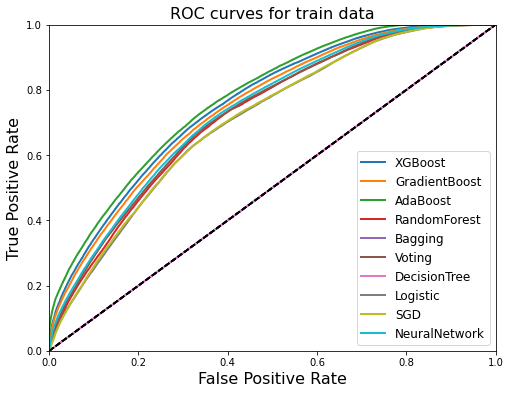

In [313]:
#ROC for train data

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_train_xgb, tpr_train_xgb, "XGBoost" )
plot_roc_curve(fpr_train_gb, tpr_train_gb, "GradientBoost")
plot_roc_curve(fpr_train_ada, tpr_train_ada, "AdaBoost")
plot_roc_curve(fpr_train_rf, tpr_train_rf, "RandomForest")
plot_roc_curve(fpr_train_bag, fpr_train_bag, "Bagging")
plot_roc_curve(fpr_train_vt, tpr_train_vt, "Voting")
plot_roc_curve(fpr_train_dt, fpr_train_dt, "DecisionTree")
plot_roc_curve(fpr_train_log, tpr_train_log, "Logistic")
plot_roc_curve(fpr_train_sgd, tpr_train_sgd, "SGD")
plot_roc_curve(fpr_train_nn, tpr_train_nn, "NeuralNetwork")
plt.legend(loc="lower right", fontsize=12)
plt.title("ROC curves for train data", fontsize=16)
plt.show()

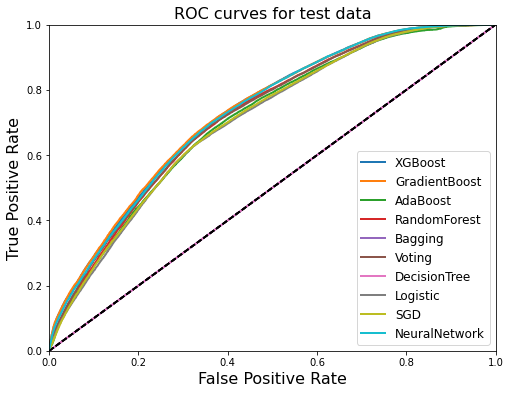

In [314]:
#ROC for test data

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_test_xgb, tpr_test_xgb, "XGBoost" )
plot_roc_curve(fpr_test_gb, tpr_test_gb, "GradientBoost")
plot_roc_curve(fpr_test_ada, tpr_test_ada, "AdaBoost")
plot_roc_curve(fpr_test_rf, tpr_test_rf, "RandomForest")
plot_roc_curve(fpr_test_bag, fpr_test_bag, "Bagging")
plot_roc_curve(fpr_test_vt, tpr_test_vt, "Voting")
plot_roc_curve(fpr_test_dt, fpr_test_dt, "DecisionTree")
plot_roc_curve(fpr_test_log, tpr_test_log, "Logistic")
plot_roc_curve(fpr_test_sgd, tpr_test_sgd, "SGD")
plot_roc_curve(fpr_test_nn, tpr_test_nn, "NeuralNetwork")
plt.legend(loc="lower right", fontsize=12)
plt.title("ROC curves for test data", fontsize=16)
plt.show()

Model of choice is GradientBoostClassifier